# Telecome churn

#### Problem Statement:
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, and build predictive models to identify customers at high risk of churn.


#### Steps overview:

- Data Understanding
	- Duplicate check
	- Churn ratio
    
- Initial sweetviz report
- Missing value imputation
	- Date columns
	- Categorical columns
	- Numerical columns
- Drop columns with more than 70 percent missing data
- Derived columns / feature engineering
	- Combine both incoming and outgoing call activity of months 6/7 and compare with month 8
	- Combine recharge of data and calls of months 6/7 and compare that with month 8
	- Grouping the customers based on AON
- Drop the columns having less than 2 unique values
- Data visualisation
	- Univariate analysis
	- Bivariate analysis
	- Segmented analysis
- Data preparation & Model Building
	- Dummy variable creation
	- Spliting Data into train and test
	- Outlier treatment - Winsorisation
	- Feature Scaling - Standard scaler
- Model Building
	- Applying PCA
        - Applying Logistic regression on the new Principal components
        - Finding Optimal Cutoff Point - Logistic
        - Evaluation metrics - Logistic
	
	- Applying Random forest
        - Hypermeter tunning - Random forest
        - Finding Optimal Cutoff Point - Random forest
        - Evaluation metrics - Random forest
	
	- Applying XBboosting
        - Hypermeter tunning - XGBoosting
        - Finding Optimal Cutoff Point - XGBoosting
        - Evaluation metrics - XGBoosting
	
- Model selection
	- Comparing all the models

- Select important features from XGB classifer
- weights of features: Implement logistic model on top_imp_features

- Recommendations to Business

- Kaggle test run

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns',300)

### Data Understanding

In [3]:
churn = pd.read_csv('train.csv')

In [4]:
churn.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [5]:
# duplicate check
print('churn.shape: '+str(churn.shape))
churn_copy = churn.copy()

churn_copy = churn_copy.drop_duplicates()
print('churn_copy.shape: ' + str(churn_copy.shape))

churn.shape: (69999, 172)
churn_copy.shape: (69999, 172)


In [6]:
# churn ratio
churn['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

About 90 percent are non churn case

In [7]:
churn.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [8]:
# Checking loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou columns as they have only 0 as value
print(churn['loc_og_t2o_mou'].unique())
print(churn['std_og_t2o_mou'].unique())
print(churn['loc_ic_t2o_mou'].unique())

[ 0. nan]
[ 0. nan]
[ 0. nan]


In [9]:
# drop loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou
churn = churn.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1)

In [10]:
# drop id
churn = churn.drop(['id'],axis=1)

In [11]:
churn.shape

(69999, 168)

In [12]:
# Before going through data preparation, lets use sweetviz to create visualisation

!pip install sweetviz

#Auto EDA import sweetviz as sv sweet_report = sv.analyze(churn,pairwise_analysis="off") sweet_report.show_html('sweet_report.html')

There are no Duplicate rows
Follow features have more than 70% of missing values:
 date_of_last_rech_data_X
 total_rech_data_X
 max_rech_data_X
 count_rech_2g_X
 count_rech_3g_X
 av_rech_amt_data_X
 arpu_3g_X
 arpu_2g_X
 night_pck_user_X
 fb_user_X
night_pck_user_X and fb_user_X represent categorical values

In [13]:
# changing night_pck_user_X, fb_user_X columns to categorical values
cat_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
churn[cat_cols] = churn[cat_cols].astype('object')

In [14]:
#### convert date columns into datetime object
cols = churn.columns.to_list()
date_cols = [col for col in cols if 'date' in col]
print("Date columns present in churn df: {}".format(str(date_cols)))
len(date_cols)

Date columns present in churn df: ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


9

In [15]:
num_cols = churn.select_dtypes(include=['float64','int64']).columns

In [16]:
print('Numerical columns in churn: {} '.format(len(churn.select_dtypes(include=['float64','int64']).columns)) )
print('Categorical columns in churn: {} '.format(len(churn.select_dtypes(include=['object']).columns)) )

Numerical columns in churn: 153 
Categorical columns in churn: 15 


### Missing value imputation

In [17]:
def miss_fun(df):
    
    miss_count = churn.isnull().sum()
    miss_perc = (churn.isnull().sum()/churn.shape[0])*100
    
    # concat to create new df
    miss_df= pd.concat([miss_count,miss_perc],axis=1)

    # rename  the columns
    miss_df = miss_df.rename(columns={0: "missing_count", 1: "missing_percentage"})

    # filter only columns with missing values and sort with descending order
    miss_df = miss_df[miss_df.iloc[:,1] !=0].sort_values('missing_percentage',ascending = False)

    print('Number of features with missing values: {} of total {}.'.format(miss_df.shape[0],churn.shape[1]))
    return miss_df

In [18]:
miss_df = miss_fun(churn)
miss_df

Number of features with missing values: 122 of total 168.


,missing_count,missing_percentage
max_rech_data_6,52431,74.902499
count_rech_2g_6,52431,74.902499
fb_user_6,52431,74.902499
date_of_last_rech_data_6,52431,74.902499
night_pck_user_6,52431,74.902499
count_rech_3g_6,52431,74.902499
arpu_2g_6,52431,74.902499
av_rech_amt_data_6,52431,74.902499
arpu_3g_6,52431,74.902499
total_rech_data_6,52431,74.902499


In [19]:
# Missing values in date column
churn[date_cols].isnull().sum()

last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
date_of_last_rech_6          1101
date_of_last_rech_7          1234
date_of_last_rech_8          2461
date_of_last_rech_data_6    52431
date_of_last_rech_data_7    52134
date_of_last_rech_data_8    51582
dtype: int64

In [20]:
# Assign a value of 1 to rows containing dates; otherwise, assign a value of 0.
for col in date_cols:
    churn.loc[churn[col].notnull(),col] = 1
    churn.loc[churn[col].isnull(),col] = 0
    churn[col] = churn[col].astype('int64')

In [21]:
churn[date_cols].isnull().sum()

last_date_of_month_6        0
last_date_of_month_7        0
last_date_of_month_8        0
date_of_last_rech_6         0
date_of_last_rech_7         0
date_of_last_rech_8         0
date_of_last_rech_data_6    0
date_of_last_rech_data_7    0
date_of_last_rech_data_8    0
dtype: int64

In [22]:
print(len(churn[(churn['date_of_last_rech_6']==0) & (churn['total_rech_amt_6'] == 0)]))
print(len(churn[(churn['date_of_last_rech_7']==0) & (churn['total_rech_amt_7'] == 0)]))
print(len(churn[(churn['date_of_last_rech_8']==0) & (churn['total_rech_amt_8'] == 0)]))

1101
1234
2461


In [23]:
print(len(churn[(churn['date_of_last_rech_data_6']==0) & (churn['total_rech_data_6'].isnull())]))
print(len(churn[(churn['date_of_last_rech_data_7']==0) & (churn['total_rech_data_7'].isnull())]))
print(len(churn[(churn['date_of_last_rech_data_8']==0) & (churn['total_rech_data_8'].isnull())]))

52431
52134
51582


It is clear that date is null as there is no recharge done by customer.

In [24]:
# so update all the columns related to recharge to 0
rech_cols_zero = [col for col in miss_df.index if (('rech' in col) & ('date' not in col))]
rech_cols_zero

['max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'total_rech_data_6',
 'av_rech_amt_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'count_rech_2g_8']

In [25]:
# update null recharge columns to 0
churn[rech_cols_zero] = churn[rech_cols_zero].fillna(0)

In [26]:
# Missing values in categorical column
churn[cat_cols].isnull().sum()

night_pck_user_6    52431
night_pck_user_7    52134
night_pck_user_8    51582
fb_user_6           52431
fb_user_7           52134
fb_user_8           51582
dtype: int64

Even though more than 70 percent data is missing, but since they are special column lets impute them with new category 2. We can do dummy encoding later.

In [27]:
for col in cat_cols:
    churn[col] = churn[col].fillna(2).astype('object')

In [28]:
churn[cat_cols].isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
dtype: int64

### Drop columns with more than 70 percent missing values

In [29]:
miss_df = miss_fun(churn)
drop_70_miss_cols = miss_df[miss_df.loc[:,'missing_percentage'] > 70].index

Number of features with missing values: 93 of total 168.


In [30]:
churn = churn.drop(drop_70_miss_cols,axis = 1)

In [31]:
miss_df = miss_fun(churn)
miss_df

Number of features with missing values: 87 of total 162.


,missing_count,missing_percentage
ic_others_8,3703,5.290076
og_others_8,3703,5.290076
std_og_t2t_mou_8,3703,5.290076
loc_ic_t2f_mou_8,3703,5.290076
loc_ic_t2t_mou_8,3703,5.290076
loc_og_mou_8,3703,5.290076
loc_ic_mou_8,3703,5.290076
std_og_t2f_mou_8,3703,5.290076
loc_og_t2c_mou_8,3703,5.290076
std_ic_t2t_mou_8,3703,5.290076


In [32]:
# We are left with most of the numeric columns related in Incoming and outgoing calls - mou
pd.concat([miss_df[['6' in ind for ind in miss_df.index ]].reset_index(),
           miss_df[['7' in ind for ind in miss_df.index ]].reset_index(),
           miss_df[['8' in ind for ind in miss_df.index ]].reset_index()],axis=1)

,index,missing_count,missing_percentage,index,missing_count,missing_percentage,index,missing_count,missing_percentage
0,loc_ic_t2t_mou_6,2768,3.954342,roam_ic_mou_7,2687,3.838626,ic_others_8,3703,5.290076
1,og_others_6,2768,3.954342,spl_ic_mou_7,2687,3.838626,og_others_8,3703,5.290076
2,loc_ic_t2m_mou_6,2768,3.954342,std_ic_t2f_mou_7,2687,3.838626,std_og_t2t_mou_8,3703,5.290076
3,std_ic_t2m_mou_6,2768,3.954342,roam_og_mou_7,2687,3.838626,loc_ic_t2f_mou_8,3703,5.290076
4,loc_ic_t2f_mou_6,2768,3.954342,std_ic_mou_7,2687,3.838626,loc_ic_t2t_mou_8,3703,5.290076
5,loc_ic_mou_6,2768,3.954342,isd_ic_mou_7,2687,3.838626,loc_og_mou_8,3703,5.290076
6,std_ic_t2t_mou_6,2768,3.954342,loc_og_t2t_mou_7,2687,3.838626,loc_ic_mou_8,3703,5.290076
7,std_ic_t2f_mou_6,2768,3.954342,offnet_mou_7,2687,3.838626,std_og_t2f_mou_8,3703,5.290076
8,std_ic_t2o_mou_6,2768,3.954342,std_ic_t2o_mou_7,2687,3.838626,loc_og_t2c_mou_8,3703,5.290076
9,std_ic_mou_6,2768,3.954342,ic_others_7,2687,3.838626,std_ic_t2t_mou_8,3703,5.290076


##### common missing count in each month:
month 6 = 2768;
month 7 = 2687;
month 8 = 3703

Lets compare mou of incoming and outgoing features with total mou of incoming and outgoing calls info

In [33]:
print(churn[(churn.roam_og_mou_6.isnull()) & (churn.total_og_mou_6 == 0)].shape)
print(churn[(churn.roam_ic_mou_6.isnull()) & (churn.total_ic_mou_6 == 0)].shape)

(2768, 162)
(2768, 162)


In [34]:
print(churn[(churn.roam_og_mou_7.isnull()) & (churn.total_og_mou_7 == 0)].shape)
print(churn[(churn.roam_ic_mou_7.isnull()) & (churn.total_ic_mou_7 == 0)].shape)

(2687, 162)
(2687, 162)


In [35]:
print(churn[(churn.roam_og_mou_8.isnull()) & (churn.total_og_mou_8 == 0)].shape)
print(churn[(churn.roam_ic_mou_8.isnull()) & (churn.total_ic_mou_8 == 0)].shape)

(3703, 162)
(3703, 162)


Looks like value of total mou of ic and og values are 0 when other sub features mou of ic/og are null. So updating the other features as 0

In [36]:
mou_6 = miss_df[[(('6' in ind) & ('date' not in ind))  for ind in miss_df.index ]].index
mou_7 = miss_df[[(('7' in ind) & ('date' not in ind))  for ind in miss_df.index ]].index
mou_8 = miss_df[[(('8' in ind) & ('date' not in ind))  for ind in miss_df.index ]].index

In [37]:
churn[mou_6] = churn[mou_6].fillna(0)
churn[mou_7] = churn[mou_7].fillna(0)
churn[mou_8] = churn[mou_8].fillna(0)

In [38]:
miss_df = miss_fun(churn)
miss_df

Number of features with missing values: 0 of total 162.


,missing_count,missing_percentage


In [39]:
# drop columns related to last_date_of_month_X

churn = churn.drop(['last_date_of_month_8','last_date_of_month_7','last_date_of_month_6'],axis=1)

### Derived columns / feature engineering

Using following 'total' columns, lets try to identify if there is pattern for churn cases:
- total_og_mou_6 + total_ic_mou_6
- total_og_mou_7 + total_ic_mou_6
- total_og_mou_8 + total_ic_mou_6

-----
Combined total recharge of call services and data bundles
- total_rech_amt_6 + (total_rech_data_6 * av_rech_amt_data_6)
- total_rech_amt_7 + (total_rech_data_6 * av_rech_amt_data_6)
- total_rech_amt_8 + (total_rech_data_6 * av_rech_amt_data_6)


Idea is to combine month 6 and 7 and compare its average with that of month 8.

- Grouping the customers based on AON 


New columns created during feature engineers, can be used during EDA.

In [40]:
churn_FE = churn.copy()

###### Combine both incoming and outgoing call activity of months 6/7 and compare with month 8

In [41]:
churn_FE['fe_total_og_ic_6_7_avg'] = ((churn_FE.total_og_mou_6 + churn_FE.total_og_mou_7)/2) + ((churn_FE.total_ic_mou_6 + churn_FE.total_ic_mou_7)/2)

In [42]:
# compare 'total_og_ic_6_7_avg' with incoming and outgoing calls activities in month 8 with cut off 75% of avg of month 6/7
churn_FE['fe_og_ic_8'] = churn_FE.total_og_mou_8 + churn_FE.total_ic_mou_8
churn_FE['fe_og_ic_compare_flg']= churn_FE['fe_og_ic_8'] > (churn_FE['fe_total_og_ic_6_7_avg'] * 0.75)

In [43]:
churn_FE['fe_og_ic_compare_flg'] = churn_FE['fe_og_ic_compare_flg'].map({False:0,True:1})

In [44]:
# check the ratio of how many churn cases found, when customer activity drops by 25% compared to average of previous two months

churn_FE[(churn_FE['churn_probability'] == 1) & (churn_FE['fe_og_ic_compare_flg'] == 0)].shape[0]/churn_FE[churn_FE['churn_probability'] == 1].shape[0]

0.849831744251262

There are about 85% churn cases when the ic and og activity decrease by 25% compared to average of previous two months

###### Combine recharge of data and calls of months 6/7 and compare that with month 8

In [45]:
# first calculate total recharge amount for data
churn_FE['fe_total_rech_data_amnt_6_7'] = (churn_FE.total_rech_data_6 * churn_FE.av_rech_amt_data_6)+(churn_FE.total_rech_data_7 * churn_FE.av_rech_amt_data_7)

# combine recharge amount of call and data
churn_FE['fe_combine_total_6_7'] = (churn_FE.total_rech_amt_6 + churn_FE.total_rech_amt_7 + churn_FE['fe_total_rech_data_amnt_6_7'])/2


In [46]:
# compare 'fe_combine_total_6_7' with combined recharge amount in month 8 with cut off 75%
churn_FE['fe_total_rechr_compare_flg'] =((churn_FE.total_rech_data_8 * churn_FE.av_rech_amt_data_8)+churn_FE.total_rech_amt_8) > (churn_FE['fe_combine_total_6_7'] * 0.75)

In [47]:
churn_FE['fe_total_rechr_compare_flg'] = churn_FE['fe_total_rechr_compare_flg'].map({False:0,True:1})

In [48]:
# check the ratio of how many churn cases found, when customer activity drops by 25% compared to average of previous two months

churn_FE[(churn_FE['churn_probability'] == 1) & (churn_FE['fe_total_rechr_compare_flg'] == 0)].shape[0]/churn_FE[churn_FE['churn_probability'] == 1].shape[0]

0.7899607403252944

There are about 80% churn cases when the recharge decrease by 25% compared to average of previous two months

###### Grouping the customers based on AON

In [49]:
np.percentile(churn_FE.aon/365,[0,25,50,75,100])

array([ 0.49315068,  1.28219178,  2.37808219,  4.96712329, 11.88219178])

In [50]:
ranges = [0.49315068,  1.28219178,  2.37808219,  4.96712329, 11.88219178]
categories = ['Less than 1 year', '1-2 years', '2-4.5 years', '4.5+ years']
churn_FE['fe_aon_group'] = pd.cut(churn_FE.aon/365, bins = ranges, labels=categories)

#### Drop the columns having less than 2 unique values

In [51]:
drop_col = [col for col in churn.columns if len(churn[col].unique()) < 2]
drop_col

['circle_id',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [52]:
churn = churn.drop(drop_col,axis = 1)
churn_FE = churn_FE.drop(drop_col,axis = 1)

### Data visualisation


In [53]:
num_cols = churn.select_dtypes(exclude=['object']).columns
cat_cols = churn.select_dtypes(include=['object']).columns

<AxesSubplot:xlabel='fe_aon_group', ylabel='count'>

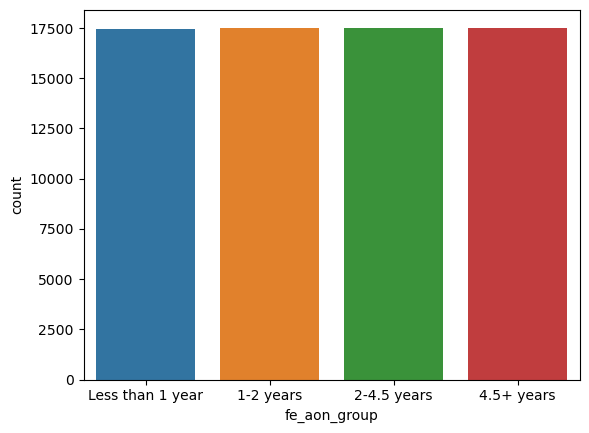

In [54]:
# univariate analysis
sns.countplot(churn_FE['fe_aon_group'])

<AxesSubplot:xlabel='churn_probability', ylabel='count'>

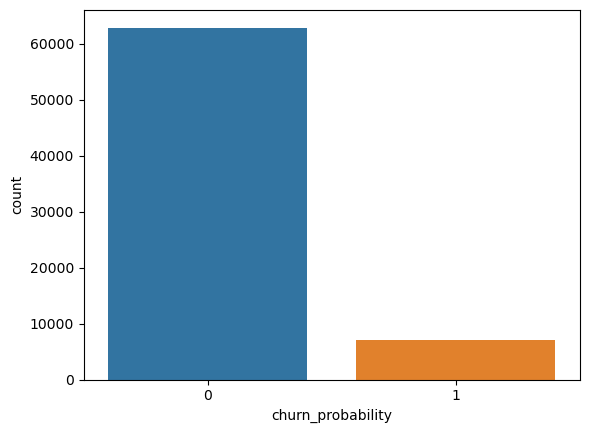

In [55]:
sns.countplot(churn_FE['churn_probability'])

In [56]:
# function for subplots
def subplot_plt(list_features):
    
    num_features = len(list_features)
    
    fig, axs = plt.subplots(num_features, 2, figsize=(8,10))
    
    i=1
    for col in list_features:
        plt.subplot(num_features,2,i)
        sns.distplot(churn_FE[col])
        i= i+1
        plt.subplot(num_features,2,i)
        sns.boxplot(churn_FE[col])
        i= i+1 


    fig.tight_layout()
    plt.show()
    

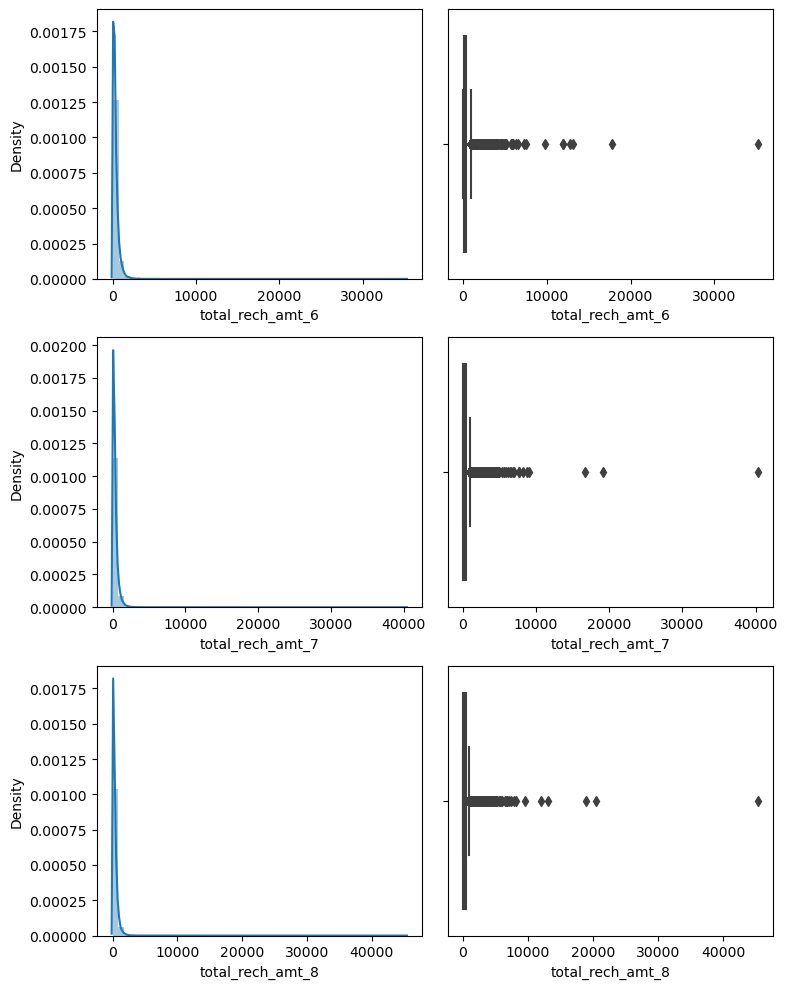

In [57]:
subplot_plt(['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'])

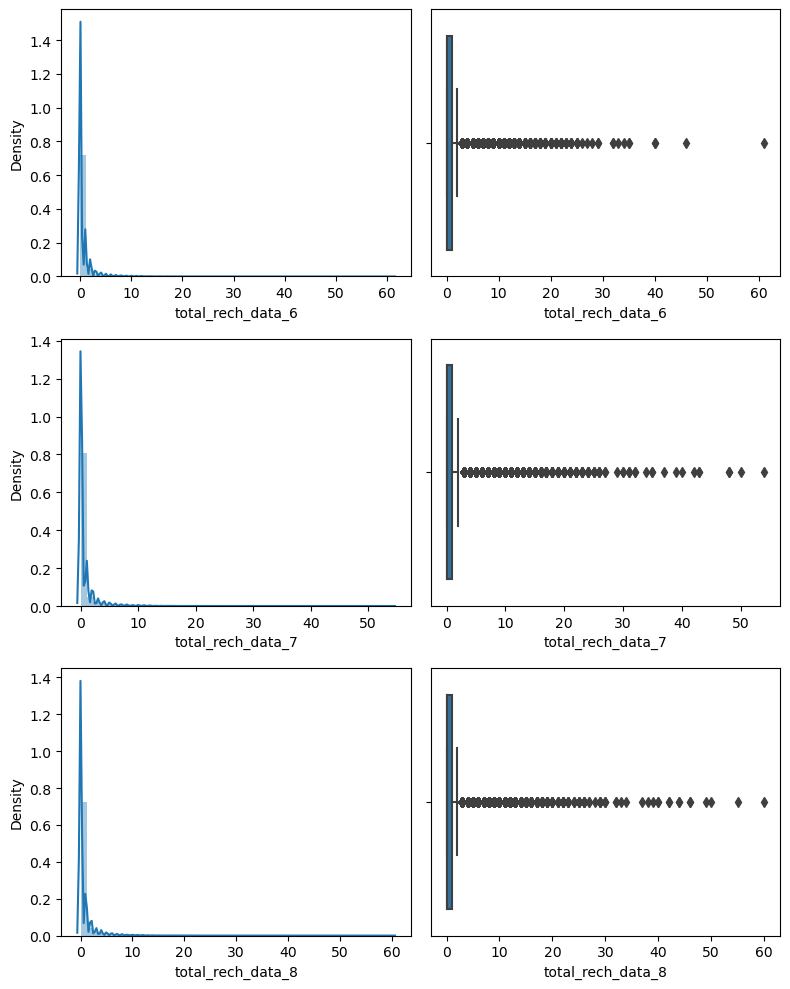

In [58]:
subplot_plt(['total_rech_data_6','total_rech_data_7','total_rech_data_8'])

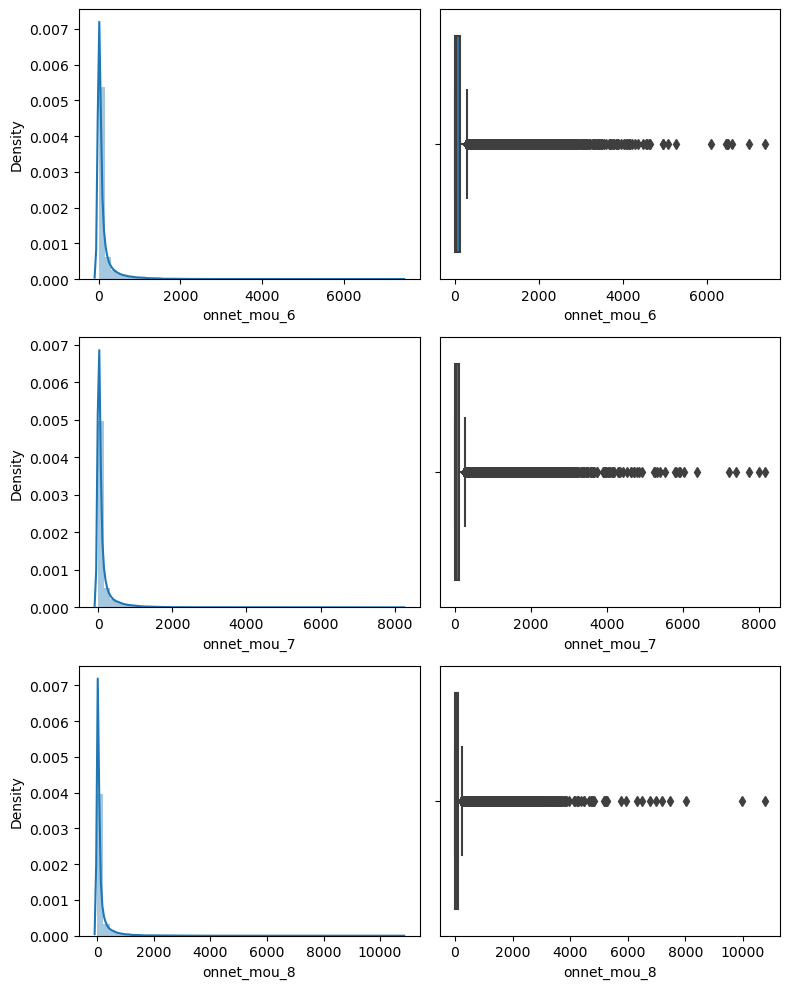

In [59]:
subplot_plt(['onnet_mou_6','onnet_mou_7','onnet_mou_8'])

summary: All the plots here represent right skewed with the outliers at right end.

##### Bivariate analysis

###### Features with high +ve or -ve correlation

In [60]:
churn_corr = churn.corrwith(churn['churn_probability'])

In [61]:
churn_corr_target = pd.DataFrame(churn.corrwith(churn['churn_probability']),columns=['correlation'])
churn_corr_target = churn_corr_target.drop('churn_probability',axis = 0)

In [62]:
trim_churn_corr_target = churn_corr_target[(churn_corr_target.correlation > 0.045) | (churn_corr_target.correlation < -0.06)].sort_values('correlation',ascending = False)

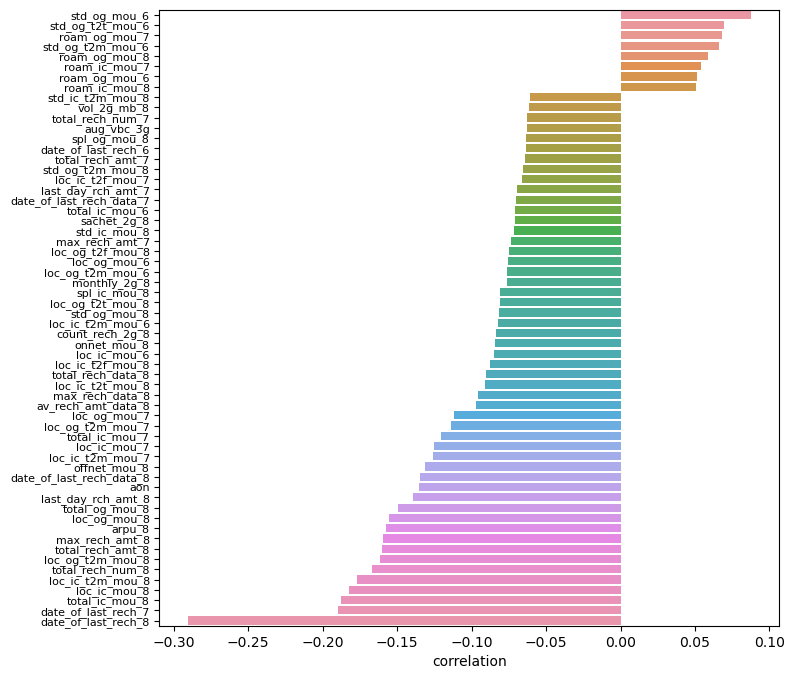

In [63]:
plt.figure(figsize=(8,8 ))
sns.barplot(y = trim_churn_corr_target.index,x = trim_churn_corr_target.correlation)
plt.yticks(fontsize = 8)
plt.show()

Most of the features are negatively correlated with target variable.

###### Correlation between the feature

In [64]:
churn_corr = churn.corr()

In [65]:
num_corr_features = 20
indices = churn_corr.unstack().sort_values(ascending=False).drop_duplicates().iloc[:num_corr_features].index

# Create a DataFrame with the top correlated features
top_corr_features = pd.DataFrame(indices.tolist(), columns=['Feature 1', 'Feature 2'])

# Filter the correlation matrix to get the actual correlation values for the top features
top_corr_values = churn_corr.loc[top_corr_features['Feature 1'], top_corr_features['Feature 2']]
top_corr_features['Correlation'] = indices.values

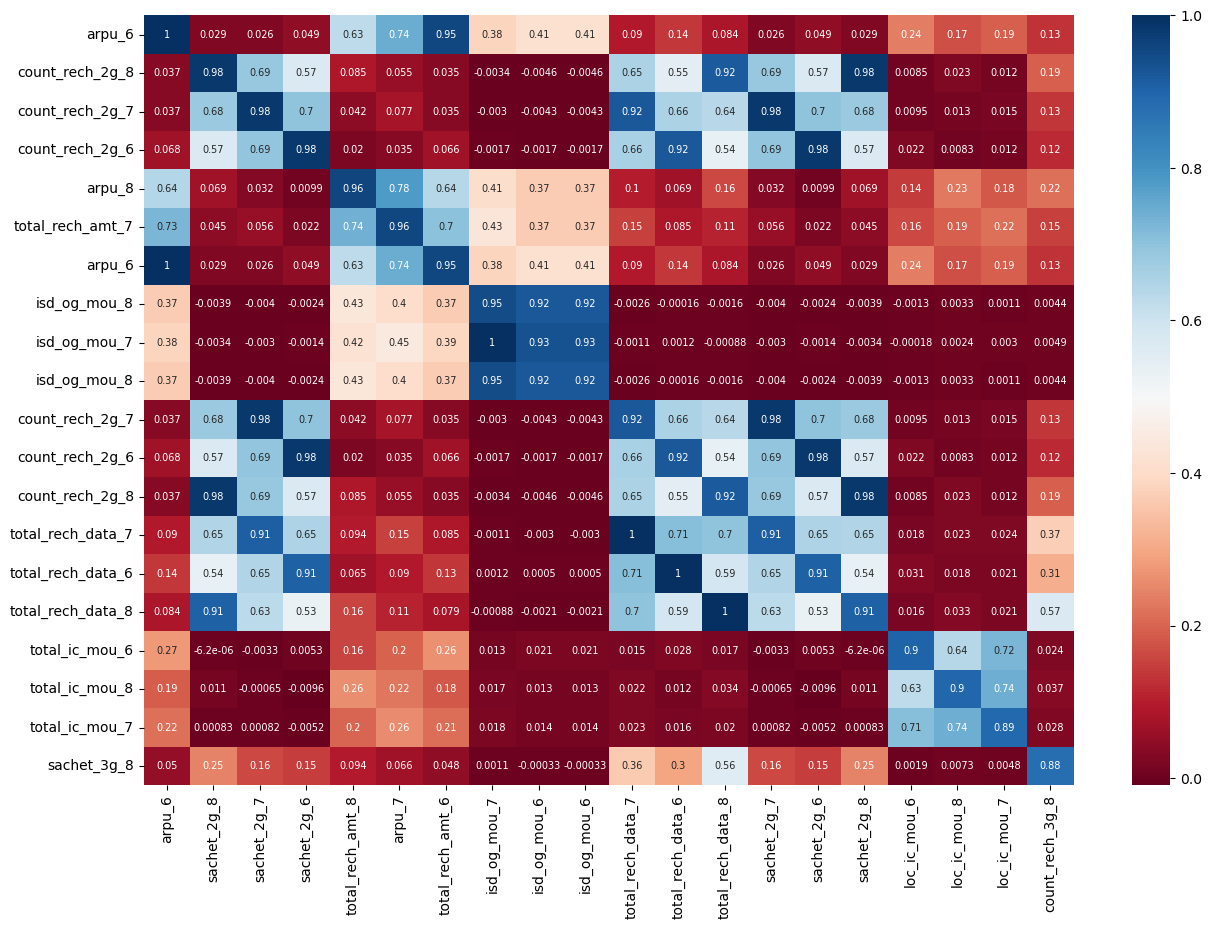

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(top_corr_values, cmap='RdBu', annot=True, 
            annot_kws={"size": 7});

###### Correlation between target variable and FE variables

In [67]:
corr_data_min_FE = churn_FE[['churn_probability', 'fe_total_rechr_compare_flg','fe_og_ic_compare_flg']]
corr_FE = corr_data_min_FE.corr()
corr_FE

,churn_probability,fe_total_rechr_compare_flg,fe_og_ic_compare_flg
churn_probability,1.000000,-0.280519,-0.359219
fe_total_rechr_compare_flg,-0.280519,1.000000,0.455881
fe_og_ic_compare_flg,-0.359219,0.455881,1.000000


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'churn_probability'),
  Text(1.5, 0, 'fe_total_rechr_compare_flg'),
  Text(2.5, 0, 'fe_og_ic_compare_flg')])

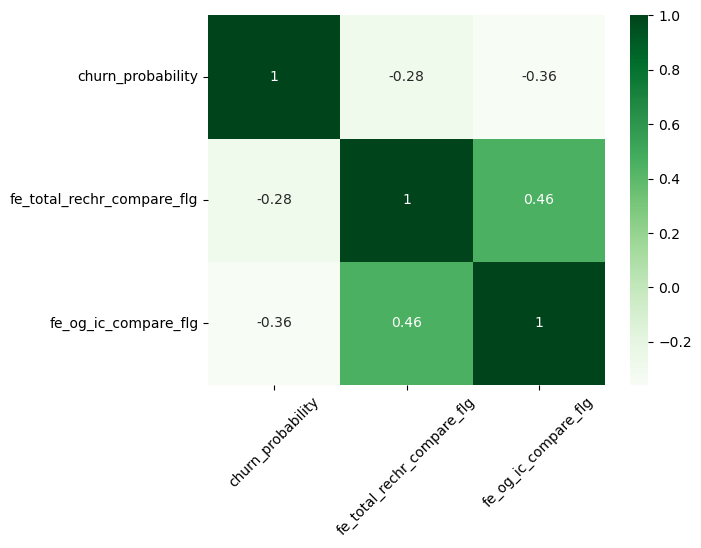

In [68]:
sns.heatmap(corr_FE,cmap='Greens',annot=True);
plt.xticks(rotation = 45)

##### Segmented analysis

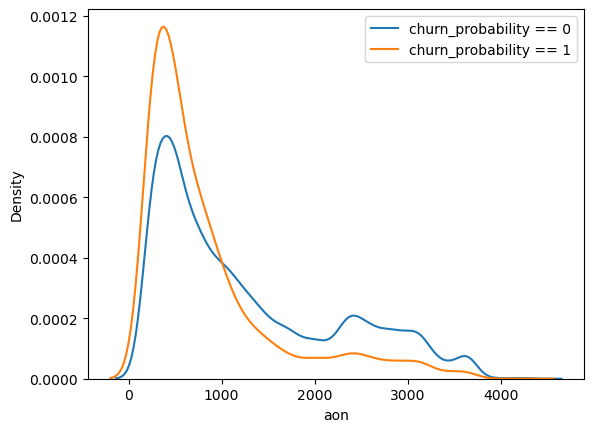

In [69]:
# aou kde plot
sns.kdeplot(churn_FE.loc[churn_FE['churn_probability'] == 0, 'aon'],label = 'churn_probability == 0')
sns.kdeplot(churn_FE.loc[churn_FE['churn_probability'] == 1, 'aon'],label = 'churn_probability == 1')
plt.legend()

<AxesSubplot:xlabel='fe_aon_group', ylabel='count'>

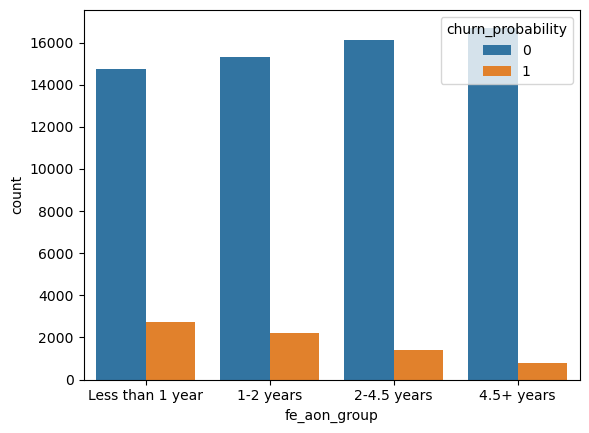

In [70]:
# aou count plot

sns.countplot(churn_FE['fe_aon_group'],hue=churn_FE['churn_probability'])

Churn rates are higher among new customers, while those who have established a longer relationship with the company are more likely to remain loyal over time.

### Data preparation & Model Building

###### add the columns created from feature engineering

- fe_total_rechr_compare_flg
- fe_og_ic_compare_flg
- fe_aon_group

In [71]:
churn_copy = churn.copy()

In [72]:
churn[['fe_total_rechr_compare_flg','fe_og_ic_compare_flg','fe_aon_group']] =churn_FE[['fe_total_rechr_compare_flg','fe_og_ic_compare_flg','fe_aon_group']].astype('object') 

In [73]:
cat_cols = churn.select_dtypes('object').columns

#### Dummy variable creation

In [74]:
dummy_churn = pd.get_dummies(churn[cat_cols],drop_first=True)
dummy_churn

,night_pck_user_6_1.0,night_pck_user_6_2.0,night_pck_user_7_1.0,night_pck_user_7_2.0,night_pck_user_8_1.0,night_pck_user_8_2.0,fb_user_6_1.0,fb_user_6_2.0,fb_user_7_1.0,fb_user_7_2.0,fb_user_8_1.0,fb_user_8_2.0,fe_total_rechr_compare_flg_1,fe_og_ic_compare_flg_1,fe_aon_group_2-4.5 years,fe_aon_group_4.5+ years,fe_aon_group_Less than 1 year
0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0
1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0
2,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
3,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0
4,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,0,1,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1
69995,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,0
69996,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,0,0
69997,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1


In [75]:
churn = pd.concat([churn,dummy_churn],axis=1)
churn_FE = pd.concat([churn_FE,dummy_churn],axis=1)

In [76]:
churn = churn.drop(cat_cols,axis =1)
churn_FE = churn_FE.drop(cat_cols,axis =1)

In [77]:
churn_FE.shape,churn.shape

((69999, 167), (69999, 163))

In [78]:
churn.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,night_pck_user_6_1.0,night_pck_user_6_2.0,night_pck_user_7_1.0,night_pck_user_7_2.0,night_pck_user_8_1.0,night_pck_user_8_2.0,fb_user_6_1.0,fb_user_6_2.0,fb_user_7_1.0,fb_user_7_2.0,fb_user_8_1.0,fb_user_8_2.0,fe_total_rechr_compare_flg_1,fe_og_ic_compare_flg_1,fe_aon_group_2-4.5 years,fe_aon_group_4.5+ years,fe_aon_group_Less than 1 year
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,1,1,1,65,65,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,1,1,1,0,0,0,0,1,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00

#### Spliting Data into train and test

In [79]:
from sklearn.model_selection import train_test_split

X = churn.drop("churn_probability", axis = 1)
y = churn.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48999, 162)
(21000, 162)
(48999,)
(21000,)


In [81]:
y_test.sum(),y_train.sum()

(2155, 4977)

In [82]:
X_train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_2.0,night_pck_user_7_1.0,night_pck_user_7_2.0,night_pck_user_8_1.0,night_pck_user_8_2.0,fb_user_6_1.0,fb_user_6_2.0,fb_user_7_1.0,fb_user_7_2.0,fb_user_8_1.0,fb_user_8_2.0,fe_total_rechr_compare_flg_1,fe_og_ic_compare_flg_1,fe_aon_group_2-4.5 years,fe_aon_group_4.5+ years,fe_aon_group_Less than 1 year
61787,373.161,468.636,679.900,60.03,98.26,62.64,658.93,970.49,1197.26,0.00,0.00,0.00,0.00,0.00,0.00,33.24,77.59,44.58,53.94,80.51,66.66,0.00,0.00,0.00,0.00,0.11,0.00,87.19,158.11,111.24,26.78,20.66,18.06,601.68,889.38,1130.59,0.00,0.0,0.00,628.46,910.04,1148.66,0.0,0.00,0.0,4.99,21.08,2.44,2.34,0.0,0.0,723.01,1089.24,1262.36,13.14,13.73,39.09,26.23,83.79,87.56,0.00,2.61,0.00,39.38,100.14,126.66,0.00,0.05,2.38,7.14,6.74,32.13,0.00,0.0,0.00,7.14,6.79,34.51,46.53,107.08,161.73,0.00,0.00,0.00,0.0,0.00,0.1,0.0,0.13,0.45,7,10,7,521,605,656,110,128,130,1,1,1,110,128,130,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,472,0.00,0.00,0.00,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,0
19961,81.812,88.382,55.468,0.00,0.00,0.00,0.00,0.28,0.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.33,1.44,14.39,0.36,0.0,0.0,0.69,1.44,14.69,9.28,11.01,9.26,2.93,14.89,16.33,0.00,0.00,0.70,12.21,25.91,26.29,0.00,0.00,3.13,0.00,0.00,0.00,0.00,0.0,11.98,0.00,0.00,15.11,12.21,26.14,41.63,0.00,0.23,0.21,0.0,0.00,0.0,0.0,0.00,0.00,9,9,8,98,100,64,14,25,25,1,1,1,14,25,25,1,1,1,7.0,8.0,5.0,14.0,25.0,25.0,7.0,8.0,5.0,0.0,0.0,0.0,98.0,200.0,114.0,192.54,300.32,241.35,0.00,0.00,0.00,0,0,0,7,8,5,0,0,0,0,0,0,577,0.00,0.00,0.00,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0
11040,366.437,264.586,247.665,47.66,34.06,115.89,203

In [83]:
X_test

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_2.0,night_pck_user_7_1.0,night_pck_user_7_2.0,night_pck_user_8_1.0,night_pck_user_8_2.0,fb_user_6_1.0,fb_user_6_2.0,fb_user_7_1.0,fb_user_7_2.0,fb_user_8_1.0,fb_user_8_2.0,fe_total_rechr_compare_flg_1,fe_og_ic_compare_flg_1,fe_aon_group_2-4.5 years,fe_aon_group_4.5+ years,fe_aon_group_Less than 1 year
57621,1127.020,1363.096,421.153,365.19,402.24,165.88,216.56,168.61,57.63,0.00,0.00,0.0,0.00,0.00,0.0,270.01,351.88,115.99,106.69,28.99,36.94,10.26,1.83,3.38,0.00,0.00,0.00,386.98,382.71,156.33,95.18,50.36,49.88,12.01,10.18,5.31,0.00,0.00,0.00,107.19,60.54,55.19,87.58,128.98,3.01,0.00,0.68,9.29,1.78,0.0,0.0,583.54,572.93,223.84,116.09,140.61,139.13,30.06,24.09,13.99,0.00,0.00,0.00,146.16,164.71,153.13,25.69,12.94,18.04,12.98,25.14,34.48,0.00,0.00,0.00,38.68,38.09,52.53,258.03,263.19,279.93,0.00,0.0,0.00,73.18,60.38,74.26,0.00,0.00,0.00,25,26,14,1525,1805,465,110,120,70,1,1,1,30,30,30,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,669,0.00,0.00,0.00,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0
39559,517.241,407.339,426.689,112.28,126.01,99.61,226.66,358.43,423.01,0.00,0.00,0.0,0.00,0.00,0.0,101.79,105.26,81.89,82.16,89.83,74.94,1.36,0.00,0.00,0.00,13.46,0.00,185.33,195.09,156.84,10.48,9.26,17.71,119.13,242.48,338.94,21.84,23.23,1.06,151.46,274.98,357.73,0.00,0.00,0.00,2.15,14.36,8.05,0.00,0.0,0.0,338.94,484.44,522.63,15.79,11.09,9.94,42.24,39.98,65.31,25.58,7.48,58.39,83.63,58.56,133.66,4.25,5.35,0.85,22.19,1.29,17.18,3.25,0.00,4.91,29.69,6.64,22.94,113.73,65.59,156.61,0.39,0.0,0.00,0.00,0.00,0.00,0.00,0.38,0.00,9,12,11,640,489,501,154,154,154,1,1,1,65,0,0,1,1,1,5.0,8.0,6.0,154.0,154.0,154.0,5.0,8.0,6.0,0.0,0.0,0.0,377.0,315.0,269.0,193.77,128.26,7.73,1102.99,812.47,1181.12,2,1,1,3,7,5,0,0,0,0,0,0,464,107

### Outlier treatment - Winsorisation

Using winsorization to remove outliers as there are many columns with outlier

_Outliers are only treated on train data(X_train)._

In [84]:
from scipy.stats import mstats
num_cols = X_train.select_dtypes(exclude='object').columns

winsorizatoin_num_cols = num_cols
outlier_df = pd.DataFrame(X_train[winsorizatoin_num_cols].mean(),columns=['Mean_original'])
winsorized_data = X_train[winsorizatoin_num_cols].apply(lambda x : mstats.winsorize(x, limits=[0.01, 0.01]))

outlier_df['winsorized_data'] = winsorized_data.mean()
outlier_df

,Mean_original,winsorized_data
arpu_6,283.810263,277.749232
arpu_7,278.541419,272.531850
arpu_8,278.480246,272.337073
onnet_mou_6,128.340710,121.327737
onnet_mou_7,129.668058,122.123461
onnet_mou_8,126.613991,118.835352
offnet_mou_6,191.229747,184.231492
offnet_mou_7,190.167992,182.891909
offnet_mou_8,185.900553,178.659730
roam_ic_mou_6,9.443025,7.389038


There no significate change in mean after the outlier treatment

In [85]:
X_train[winsorizatoin_num_cols] = winsorized_data

#### Feature Scaling - Standard scaler

In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
X_test_scaled = scaler.transform(X_test)

### Model Building

#### Applying PCA

In [91]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train_scaled)

array([[-1.30469133e-01,  5.53282219e+00,  5.41986525e+00, ...,
         2.39888395e-16, -1.63770719e-16,  1.41441370e-16],
       [ 3.68180837e+00, -9.66240585e+00,  2.98865849e+00, ...,
         1.27690691e-16,  5.77275388e-17, -2.00347224e-16],
       [-4.44520276e-01,  3.46352618e+00, -3.87748196e+00, ...,
         4.99308766e-17,  2.51265544e-16, -3.24531787e-16],
       ...,
       [ 7.32925209e+00, -9.78683384e+00,  2.68700905e-01, ...,
        -9.13771625e-18, -1.97786713e-17, -7.08130224e-17],
       [ 4.81583587e+00, -4.62230584e+00,  1.08093287e+00, ...,
         6.60040716e-17,  7.37055452e-17, -4.61547694e-17],
       [ 1.00022327e+00,  3.22168686e-01, -8.62506916e-01, ...,
         3.44221546e-17, -4.32959584e-18,  2.65301815e-17]])

In [92]:
pca.components_

array([[ 1.24730523e-01,  1.34855321e-01,  1.29914146e-01, ...,
        -1.52048136e-03,  1.42016972e-02, -3.87927819e-03],
       [ 1.07533476e-01,  1.17654667e-01,  1.10314576e-01, ...,
         5.22185387e-03,  2.84455499e-02, -2.72715557e-02],
       [ 6.57585239e-02,  8.60197995e-02,  7.52957832e-02, ...,
        -1.15202415e-03, -1.02228195e-01,  5.48663806e-02],
       ...,
       [ 0.00000000e+00, -1.78509705e-17,  1.23424251e-17, ...,
        -6.89469531e-17, -1.55819520e-16,  4.93268478e-19],
       [ 0.00000000e+00, -3.73371190e-18,  7.11018065e-17, ...,
        -4.12941388e-17, -1.81306090e-17,  8.99876817e-18],
       [ 0.00000000e+00,  2.72948499e-17,  3.45657065e-17, ...,
         2.93398854e-17,  7.88720864e-17, -5.39531857e-18]])

In [93]:
pca.explained_variance_ratio_

array([1.48867814e-01, 1.10104171e-01, 6.80733683e-02, 4.48341259e-02,
       3.67613336e-02, 2.95093965e-02, 2.56385713e-02, 2.33925248e-02,
       2.14246781e-02, 2.07014057e-02, 1.88897424e-02, 1.74628057e-02,
       1.73995645e-02, 1.68094448e-02, 1.63081142e-02, 1.39051671e-02,
       1.27727593e-02, 1.20658531e-02, 1.18236931e-02, 1.14331277e-02,
       1.07970369e-02, 9.70567677e-03, 9.35632240e-03, 9.10887569e-03,
       8.92411812e-03, 8.69199430e-03, 8.44223260e-03, 8.24799979e-03,
       7.98477521e-03, 7.57487747e-03, 7.26999252e-03, 7.20014199e-03,
       6.90721577e-03, 6.54395026e-03, 6.42023383e-03, 6.15901132e-03,
       6.06508000e-03, 5.83827870e-03, 5.75770247e-03, 5.45821584e-03,
       5.35668959e-03, 5.11560120e-03, 4.98142371e-03, 4.91496797e-03,
       4.84561499e-03, 4.62671372e-03, 4.47947974e-03, 4.41899365e-03,
       4.19024338e-03, 4.14835324e-03, 3.99000622e-03, 3.87026704e-03,
       3.80507301e-03, 3.67932105e-03, 3.66700890e-03, 3.46419695e-03,
      

In [94]:
var_pca_cum = np.cumsum(pca.explained_variance_ratio_)

Text(0.5, 1.0, 'PCA - Skee plot')

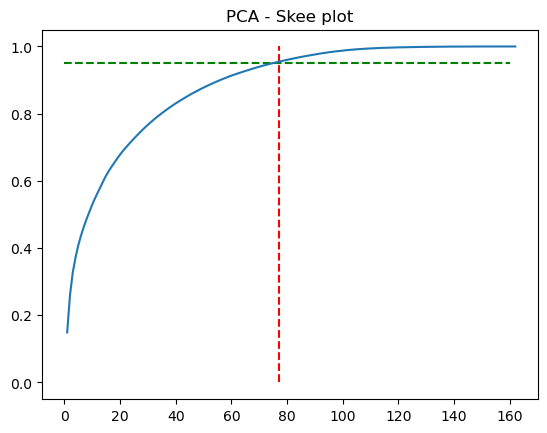

In [179]:
plt.vlines(x=77, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=160, xmin=0, colors="g", linestyles="--")
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),var_pca_cum)
plt.title('PCA - Skee plot')

For 95% explained variance, we have 77 components.

In [96]:
from sklearn.decomposition import IncrementalPCA
pca_final = PCA(n_components=77)
churn_train_pca = pca_final.fit_transform(X_train_scaled)

In [97]:
churn_train_pca.shape

(48999, 77)

In [98]:
corrmat = np.corrcoef(churn_train_pca.transpose())
corrmat.shape

(77, 77)

In [99]:
corrmat

array([[ 1.00000000e+00, -3.26437791e-16, -5.94844880e-16, ...,
        -1.99783809e-18,  4.70233891e-18,  2.18719074e-18],
       [-3.26437791e-16,  1.00000000e+00, -3.82367376e-17, ...,
        -3.46929380e-18, -9.94145059e-19, -5.59510010e-18],
       [-5.94844880e-16, -3.82367376e-17,  1.00000000e+00, ...,
        -6.84181224e-18, -1.89650627e-18,  3.88132215e-18],
       ...,
       [-1.99783809e-18, -3.46929380e-18, -6.84181224e-18, ...,
         1.00000000e+00,  9.91629734e-17, -1.19773678e-16],
       [ 4.70233891e-18, -9.94145059e-19, -1.89650627e-18, ...,
         9.91629734e-17,  1.00000000e+00, -5.15196284e-16],
       [ 2.18719074e-18, -5.59510010e-18,  3.88132215e-18, ...,
        -1.19773678e-16, -5.15196284e-16,  1.00000000e+00]])

Correlations between the new PC are close to zero

In [100]:
# apply PCA transformation on test set
churn_test_pca = pca_final.transform(X_test_scaled)

In [101]:
churn_test_pca

array([[  6.65779562,   9.71706006,  -3.34950226, ...,   2.03779272,
         14.78870379, -13.46120675],
       [ 12.00522082,  -7.3376918 ,   2.73950341, ...,  -0.48284332,
          0.45873502,  -0.20102145],
       [ -0.26480377,   5.78279504,   9.48260267, ...,   1.1907486 ,
          0.55270257,  -0.22509336],
       ...,
       [  4.69624687,  -4.05122097,   6.2589668 , ...,   0.71875426,
          0.36860354,   0.46415893],
       [  0.50337719,   4.66151038,   0.44141966, ...,   0.05168149,
         -1.15134401,   0.96745123],
       [  3.71137169,   4.11684194,   9.10400237, ...,  -0.13740196,
         -0.36654087,   0.33002211]])

### Applying Logistic regression on the new Principal components

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log_pca = LogisticRegression(class_weight='balanced',random_state=42)
model_pca = log_pca.fit(churn_train_pca,y_train)

In [103]:
y_train_pred = model_pca.predict(churn_train_pca)

In [104]:
# probabilities at default cutoff probability threshold of 0.5
pred_train_log_pca = model_pca.predict_proba(churn_train_pca)[:,1]
pred_train_log_pca

array([0.19914408, 0.04271584, 0.02306382, ..., 0.09018851, 0.56665974,
       0.14840576])

In [105]:
def evaluation_mat (y_actual,y_pred):
    
    evaluation_df = pd.DataFrame(columns=['score'])
    
    confusion_mat = metrics.confusion_matrix(y_actual,y_pred)
    TN = confusion_mat[0,0]
    FP = confusion_mat[0,1]
    FN = confusion_mat[1,0]
    TP = confusion_mat[1,1]
    
    accuracy = metrics.accuracy_score(y_actual,y_pred)
    sensitivity = TP / float(TP+FN)
    specificity = TN / float(TN+FP)
    false_postive_rate = FP/ float(TN+FP)
    precison = TP / float(TP+FP)
    
    evaluation_df.loc['accuracy'] = accuracy
    evaluation_df.loc['sensitivity'] = sensitivity
    evaluation_df.loc['specificity'] = specificity
    evaluation_df.loc['precison'] = precison
    evaluation_df.loc['false_postive_rate'] = false_postive_rate
    evaluation_df.loc['auc_roc'] = metrics.roc_auc_score(y_actual,y_pred)
    
    return evaluation_df

In [106]:
# evalution matrix with default probability threshold of 0.5
evaluation_mat(y_train,y_train_pred)

,score
accuracy,0.824629
sensitivity,0.839462
specificity,0.822952
precison,0.348981
false_postive_rate,0.177048
auc_roc,0.831207


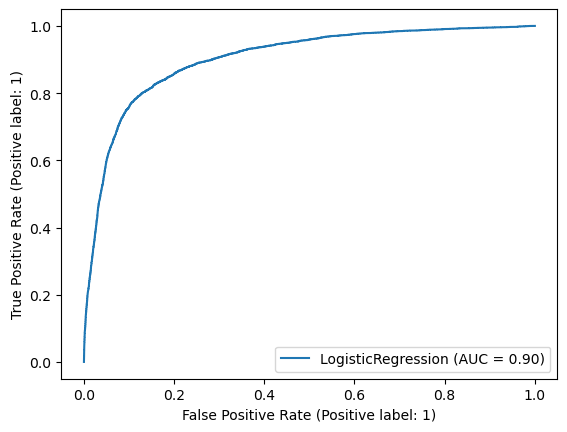

In [107]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score

plot_roc_curve(model_pca, churn_train_pca, y_train, drop_intermediate=False)
plt.show()

#####  Finding Optimal Cutoff Point - Logistic
 Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [108]:
# create cutoff_pred_summary_df dataframe which hold predictions for different cutoff
def cutoff_pred_summary(y_train,model_pred_prob):
    
    cutoff_pred_summary_df = pd.DataFrame(y_train.values,columns=['churn'])
    cutoff_pred_summary_df['churn_prob'] = model_pred_prob

    numbers = [float(x)/10 for x in range(10)]

    for i in numbers:
        cutoff_pred_summary_df[i]= cutoff_pred_summary_df.churn_prob.map(lambda x: 1 if x > i else 0)

    return cutoff_pred_summary_df

In [109]:
cutoff_pred_summary_df = cutoff_pred_summary(y_train,pred_train_log_pca)
cutoff_pred_summary_df.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.199144,1,1,0,0,0,0,0,0,0,0
1,0,0.042716,1,0,0,0,0,0,0,0,0,0
2,0,0.023064,1,0,0,0,0,0,0,0,0,0
3,0,0.769380,1,1,1,1,1,1,1,1,0,0
4,0,0.107424,1,1,0,0,0,0,0,0,0,0


In [110]:
# create cutoff_df dataframe to hold evalution scores for different cutoffs

def cutoff_eval_summary(cutoff_summary_df):
    cutoff_eval_summary_df =pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

    for val in num:
        conf_mat = metrics.confusion_matrix(cutoff_summary_df['churn'],cutoff_summary_df[val])
        accuracy = metrics.accuracy_score(cutoff_summary_df['churn'],cutoff_summary_df[val])
        sensitivity = conf_mat[1,1]/(conf_mat[1,1]+conf_mat[1,0])
        specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
        cutoff_eval_summary_df.loc[val] =[ val ,accuracy,sensitivity,specificity]
    return cutoff_eval_summary_df

In [111]:
cutoff_eval_summary_df = cutoff_eval_summary(cutoff_pred_summary_df)
print(cutoff_eval_summary_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.101574     1.000000     0.000000
0.1   0.1  0.450662     0.976894     0.391168
0.2   0.2  0.606421     0.946353     0.567989
0.3   0.3  0.709729     0.912196     0.686838
0.4   0.4  0.781057     0.877838     0.770115
0.5   0.5  0.824629     0.839462     0.822952
0.6   0.6  0.858732     0.804702     0.864840
0.7   0.7  0.888916     0.752059     0.904389
0.8   0.8  0.912917     0.617842     0.946277
0.9   0.9  0.912304     0.263814     0.985621


<Figure size 100x100 with 0 Axes>

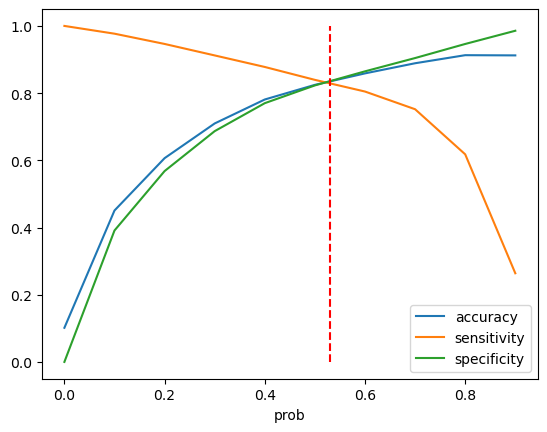

In [112]:
plt.figure(figsize=(1, 1))
cutoff_eval_summary_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity']);
plt.vlines(x=0.53,ymin=0,ymax=1,linestyles='dashed',colors='red');
plt.show();

If we try to balance sensitive and specificy, then from the curve above, 0.53 is the optimum point to take it as a cutoff probability.

##### Evaluation metrics - Logistic

In [113]:
cutoff_pred_summary_df['final_predicted'] = cutoff_pred_summary_df.churn_prob.map( lambda x: 1 if x > 0.53 else 0)

cutoff_pred_summary_df.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.199144,1,1,0,0,0,0,0,0,0,0,0
1,0,0.042716,1,0,0,0,0,0,0,0,0,0,0
2,0,0.023064,1,0,0,0,0,0,0,0,0,0,0
3,0,0.769380,1,1,1,1,1,1,1,1,0,0,1
4,0,0.107424,1,1,0,0,0,0,0,0,0,0,0


In [114]:
# Let's check the evaluation metrics with cuttoff at 0.53
evaluation_mat(y_train,cutoff_pred_summary_df.final_predicted)

,score
accuracy,0.834935
sensitivity,0.831625
specificity,0.835310
precison,0.363421
false_postive_rate,0.164690
auc_roc,0.833468


In [115]:
# evaluting test set
test_churn_prob = model_pca.predict_proba(churn_test_pca)[:,1]
test_churn_prob

array([0.99227133, 0.02344118, 0.34214618, ..., 0.14861146, 0.02009359,
       0.05105993])

In [116]:
# Apply cutoff to test set probability
test_pred_summary = pd.DataFrame(columns=['churn'])

test_pred_summary['churn'] = y_test
test_pred_summary = test_pred_summary.reset_index()

test_pred_summary['test_churn_prob'] = test_churn_prob

test_pred_summary['test_churn_pred'] = test_pred_summary.test_churn_prob.map( lambda x: 1 if x > 0.53 else 0)

In [117]:
# Let's check the evaluation metrics with cuttoff at 0.53 on test data set
evaluation_mat(y_test,test_pred_summary['test_churn_pred'])

,score
accuracy,0.827524
sensitivity,0.841299
specificity,0.825949
precison,0.355979
false_postive_rate,0.174051
auc_roc,0.833624


## Applying Random forest 

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [119]:
rf = RandomForestClassifier(random_state=42,n_jobs=-1,class_weight='balanced')

###### Hypermeter tunning - Random Forest

In [120]:
params = {
    'max_depth': [5,8,10],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [25, 50, 75, 90]
}

In [121]:
grid_cv_rf = GridSearchCV(rf,param_grid=params,cv=3,verbose=2,n_jobs=-1,scoring='accuracy')

In [122]:
%%time
grid_cv_rf.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Wall time: 1min 59s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 8, 10],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [25, 50, 75, 90]},
             scoring='accuracy', verbose=2)

In [138]:
rf_best = grid_cv_rf.best_estimator_
print(rf_best)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, n_estimators=90, n_jobs=-1,
                       random_state=42)


In [139]:
rf_model = rf_best.fit(X_train_scaled,y_train)

In [140]:
model_train_pred_rf = rf_best.predict(X_train_scaled)

In [141]:
metrics.confusion_matrix(y_train,model_train_pred_rf)

array([[42179,  1843],
       [  696,  4281]], dtype=int64)

In [142]:
accuracy_score(y_train,model_train_pred_rf)

0.9481826159717546

In [143]:
# evaluation metrics with default cutoff at 0.5 on train dataset
evaluation_mat(y_train,model_train_pred_rf)

,score
accuracy,0.948183
sensitivity,0.860157
specificity,0.958135
precison,0.699053
false_postive_rate,0.041865
auc_roc,0.909146


In [144]:
# evaluation metrics with default cutoff at 0.5 on test dataset
model_test_pred_rf = rf_model.predict(X_test_scaled)
evaluation_mat(y_test,model_test_pred_rf)

,score
accuracy,0.931619
sensitivity,0.754988
specificity,0.951817
precison,0.641815
false_postive_rate,0.048183
auc_roc,0.853403


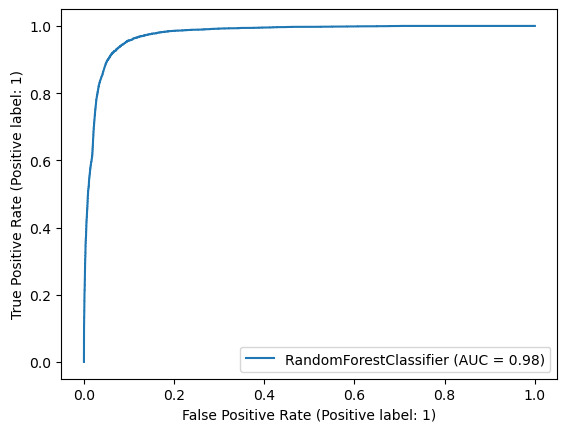

In [145]:
plot_roc_curve(rf_best,X_train_scaled,y_train)

###### Finding Optimal Cutoff Point - Random forest

In [146]:
model_pred_train_rf_prob = rf_model.predict_proba(X_train_scaled)[:,1]

cutoff_pred_summary_rf_df = cutoff_pred_summary(y_train,model_pred_train_rf_prob)
cutoff_pred_summary_rf_df.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.081698,1,0,0,0,0,0,0,0,0,0
1,0,0.138236,1,1,0,0,0,0,0,0,0,0
2,0,0.028018,1,0,0,0,0,0,0,0,0,0
3,0,0.687943,1,1,1,1,1,1,1,0,0,0
4,0,0.067515,1,0,0,0,0,0,0,0,0,0


In [147]:
cutoff_eval_summary_rf_df = cutoff_eval_summary(cutoff_pred_summary_rf_df)
print(cutoff_eval_summary_rf_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.101574     1.000000     0.000000
0.1   0.1  0.540072     0.997187     0.488392
0.2   0.2  0.810710     0.986136     0.790877
0.3   0.3  0.897916     0.962226     0.890646
0.4   0.4  0.933672     0.922242     0.934964
0.5   0.5  0.948183     0.860157     0.958135
0.6   0.6  0.952938     0.790637     0.971287
0.7   0.7  0.950162     0.708459     0.977489
0.8   0.8  0.945570     0.633313     0.980873
0.9   0.9  0.944346     0.587904     0.984644


<Figure size 100x100 with 0 Axes>

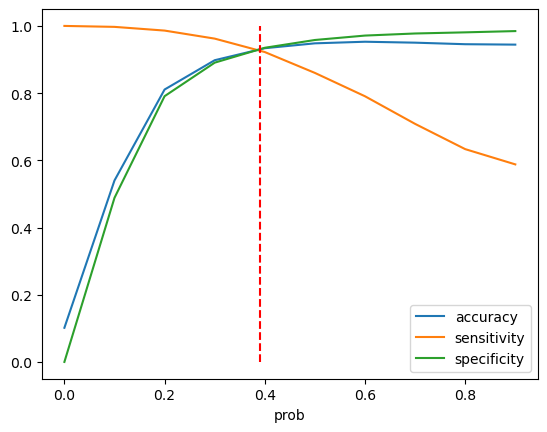

In [148]:
plt.figure(figsize=(1, 1))
cutoff_eval_summary_rf_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity']);
plt.vlines(x=0.39,ymin=0,ymax=1,linestyles='dashed',colors='red');
plt.show();

###### Evaluation metrics - Random forest

In [149]:
cutoff_pred_summary_rf_df['final_predicted'] = cutoff_pred_summary_rf_df.churn_prob.map( lambda x: 1 if x > 0.39 else 0)

cutoff_pred_summary_rf_df.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.081698,1,0,0,0,0,0,0,0,0,0,0
1,0,0.138236,1,1,0,0,0,0,0,0,0,0,0
2,0,0.028018,1,0,0,0,0,0,0,0,0,0,0
3,0,0.687943,1,1,1,1,1,1,1,0,0,0,1
4,0,0.067515,1,0,0,0,0,0,0,0,0,0,0


In [150]:
# Let's check the evaluation metrics with cuttoff at 0.39 - train data
evaluation_mat(y_train,cutoff_pred_summary_rf_df.final_predicted)

,score
accuracy,0.930999
sensitivity,0.925457
specificity,0.931625
precison,0.604779
false_postive_rate,0.068375
auc_roc,0.928541


In [151]:
# evaluting test set
test_rf_churn_prob = rf_model.predict_proba(X_test_scaled)[:,1]
test_rf_churn_prob

array([0.20809757, 0.07015383, 0.12214115, ..., 0.10388096, 0.06226617,
       0.099256  ])

In [152]:
# Apply cutoff to test set probability
test_pred_rf_summary = pd.DataFrame(columns=['churn'])

test_pred_rf_summary['churn'] = y_test
test_pred_rf_summary = test_pred_rf_summary.reset_index()

test_pred_rf_summary['test_rf_churn_prob'] = test_rf_churn_prob

test_pred_rf_summary['test_rf_churn_pred'] = test_pred_rf_summary.test_rf_churn_prob.map( lambda x: 1 if x > 0.39 else 0)

In [153]:
# Let's check the evaluation metrics with cuttoff at 0.39 on test data set
evaluation_mat(y_test,test_pred_rf_summary['test_rf_churn_pred'])

,score
accuracy,0.912000
sensitivity,0.826450
specificity,0.921783
precison,0.547158
false_postive_rate,0.078217
auc_roc,0.874117


### Applying XBboosting

In [154]:
! pip install xgboost

In [155]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [156]:
positive_class_samples = sum(y_train)
negative_class_samples = len(y_train) - positive_class_samples
scale_pos_weight = negative_class_samples / positive_class_samples
scale_pos_weight

8.845087402049428

###### Hypermeter tunning - XGBoosting

In [157]:
xgb_cf = xgb.XGBClassifier(n_jobs = -1,random_state=42,objective = 'binary:logistic',scale_pos_weight=scale_pos_weight)

In [158]:
params = {
        'n_estimators' : [120],
        'learning_rate' : [0.01],
        'min_child_weight': [10],
        'gamma': [0.2],
        'max_depth': [8]
        }
grid_cv = GridSearchCV(xgb_cf,param_grid=params,cv=5,verbose=2,n_jobs=-1,scoring='accuracy')

In [159]:
%%time
xgb_model = grid_cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Wall time: 1min 47s


In [160]:
xgb_best = xgb_model.best_estimator_


In [161]:
xgb_best.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              n_estimators=120, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [162]:
model_train_pred_xgb = xgb_best.predict(X_train_scaled)

In [163]:
metrics.confusion_matrix(y_train,model_train_pred_xgb)

array([[40718,  3304],
       [  462,  4515]], dtype=int64)

In [164]:
accuracy_score(y_train,model_train_pred_xgb)

0.9231412885977265

In [165]:
# evaluation metrics with default cutoff at 0.5 on train dataset
evaluation_mat(y_train,model_train_pred_xgb)

,score
accuracy,0.923141
sensitivity,0.907173
specificity,0.924947
precison,0.577440
false_postive_rate,0.075053
auc_roc,0.916060


In [166]:
# evaluation metrics with default cutoff at 0.5 on test dataset
model_test_pred_xgb = xgb_best.predict(X_test_scaled)
evaluation_mat(y_test,model_test_pred_xgb)

,score
accuracy,0.911190
sensitivity,0.839907
specificity,0.919342
precison,0.543544
false_postive_rate,0.080658
auc_roc,0.879625


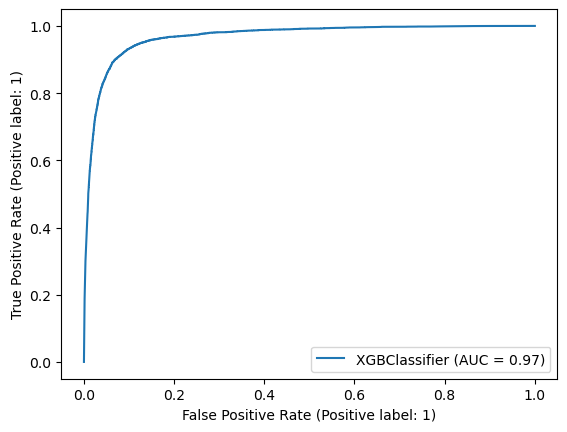

In [167]:
plot_roc_curve(xgb_best,X_train_scaled,y_train)

###### Finding Optimal Cutoff Point - XGBoosting

In [168]:
model_pred_train_xgb_prob = xgb_model.predict_proba(X_train_scaled)[:,1]

cutoff_pred_summary_xgb_df = cutoff_pred_summary(y_train,model_pred_train_xgb_prob)
cutoff_pred_summary_xgb_df.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.180887,1,1,0,0,0,0,0,0,0,0
1,0,0.194972,1,1,0,0,0,0,0,0,0,0
2,0,0.170560,1,1,0,0,0,0,0,0,0,0
3,0,0.663864,1,1,1,1,1,1,1,0,0,0
4,0,0.205795,1,1,1,0,0,0,0,0,0,0


In [169]:
cutoff_eval_summary_xgb_df = cutoff_eval_summary(cutoff_pred_summary_xgb_df)
print(cutoff_eval_summary_xgb_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.101574     1.000000     0.000000
0.1   0.1  0.101574     1.000000     0.000000
0.2   0.2  0.543134     0.992164     0.492367
0.3   0.3  0.792628     0.971268     0.772432
0.4   0.4  0.883467     0.947559     0.876221
0.5   0.5  0.923141     0.907173     0.924947
0.6   0.6  0.942121     0.842676     0.953364
0.7   0.7  0.949591     0.745630     0.972650
0.8   0.8  0.943795     0.553546     0.987915
0.9   0.9  0.898426     0.000000     1.000000


<Figure size 100x100 with 0 Axes>

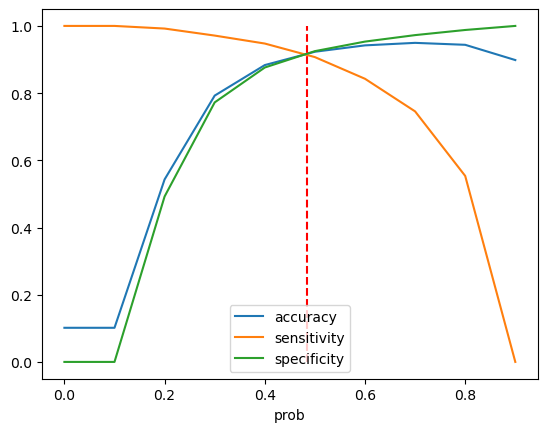

In [170]:
plt.figure(figsize=(1, 1))
cutoff_eval_summary_xgb_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity']);
plt.vlines(x=0.485,ymin=0,ymax=1,linestyles='dashed',colors='red');
plt.show();

###### Evaluation metrics - XGBoosting

In [171]:
cutoff_pred_summary_xgb_df['final_predicted'] = cutoff_pred_summary_xgb_df.churn_prob.map( lambda x: 1 if x > 0.485 else 0)

cutoff_pred_summary_xgb_df.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.180887,1,1,0,0,0,0,0,0,0,0,0
1,0,0.194972,1,1,0,0,0,0,0,0,0,0,0
2,0,0.170560,1,1,0,0,0,0,0,0,0,0,0
3,0,0.663864,1,1,1,1,1,1,1,0,0,0,1
4,0,0.205795,1,1,1,0,0,0,0,0,0,0,0


In [172]:
# Let's check the evaluation metrics with cuttoff at 0.485 - train data
evaluation_mat(y_train,cutoff_pred_summary_xgb_df.final_predicted)

,score
accuracy,0.918406
sensitivity,0.912598
specificity,0.919063
precison,0.560395
false_postive_rate,0.080937
auc_roc,0.915831


In [173]:
# evaluting test set
test_xgb_churn_prob = xgb_best.predict_proba(X_test_scaled)[:,1]
test_xgb_churn_prob

array([0.31645158, 0.24056634, 0.18090008, ..., 0.18336429, 0.18079971,
       0.18296912], dtype=float32)

In [174]:
# Apply cutoff to test set probability
test_pred_xgb_summary = pd.DataFrame(columns=['churn'])

test_pred_xgb_summary['churn'] = y_test
test_pred_xgb_summary = test_pred_xgb_summary.reset_index()

test_pred_xgb_summary['test_xgb_churn_prob'] = test_xgb_churn_prob

test_pred_xgb_summary['test_xgb_churn_pred'] = test_pred_xgb_summary.test_xgb_churn_prob.map( lambda x: 1 if x > 0.485 else 0)

In [175]:
# Let's check the evaluation metrics with cuttoff at 0.485 on test data set
evaluation_mat(y_test,test_pred_xgb_summary['test_xgb_churn_pred'])

,score
accuracy,0.907190
sensitivity,0.847332
specificity,0.914036
precison,0.529890
false_postive_rate,0.085964
auc_roc,0.880684


### Model selection

- comparing all the models

Create DF with train and test evaluation scores

In [176]:
log_pca_train_ev = evaluation_mat(y_train,cutoff_pred_summary_df.final_predicted)
log_pca_test_ev = evaluation_mat(y_test,test_pred_summary['test_churn_pred'])

rf_train_ev = evaluation_mat(y_train,cutoff_pred_summary_rf_df.final_predicted)
rf_test_ev = evaluation_mat(y_test,test_pred_rf_summary['test_rf_churn_pred'])

xgb_train_ev = evaluation_mat(y_train,cutoff_pred_summary_xgb_df.final_predicted)
xgb_test_ev = evaluation_mat(y_test,test_pred_xgb_summary['test_xgb_churn_pred'])


concatenated_ev_df = pd.concat([log_pca_train_ev, log_pca_test_ev,rf_train_ev,rf_test_ev,xgb_train_ev,xgb_test_ev], axis=1)
concatenated_ev_df.columns = ['log_pca_train_score','log_pca_test_score','rf_train_score','rf_test_score','xgb_train_score','xgb_test_score']

concatenated_ev_df

,log_pca_train_score,log_pca_test_score,rf_train_score,rf_test_score,xgb_train_score,xgb_test_score
accuracy,0.834935,0.827524,0.930999,0.912000,0.918406,0.907190
sensitivity,0.831625,0.841299,0.925457,0.826450,0.912598,0.847332
specificity,0.835310,0.825949,0.931625,0.921783,0.919063,0.914036
precison,0.363421,0.355979,0.604779,0.547158,0.560395,0.529890
false_postive_rate,0.164690,0.174051,0.068375,0.078217,0.080937,0.085964
auc_roc,0.833468,0.833624,0.928541,0.874117,0.915831,0.880684


Model with __XGB classifier__ algorithm performs better as the sensitivity and precision along with accuracy scores are better for this model which is relevant for Business problem


#### Select important features from XGB classifer

In [177]:
feature_imp_df = pd.DataFrame({'feature': X_train.columns,'imp_score': (xgb_best.feature_importances_)})

In [178]:
feature_plt=feature_imp_df.sort_values(by='imp_score',ascending=False).head(30).reset_index()
feature_plt

,index,feature,imp_score
0,65,loc_ic_mou_8,0.368487
1,14,roam_og_mou_8,0.075098
2,158,fe_og_ic_compare_flg_1,0.040015
3,104,last_day_rch_amt_8,0.036078
4,155,fb_user_8_1.0,0.017365
5,80,total_ic_mou_8,0.014258
6,63,loc_ic_mou_6,0.012723
7,40,std_og_mou_7,0.010812
8,83,spl_ic_mou_8,0.010196
9,62,loc_ic_t2f_mou_8,0.009036


In [179]:
top_imp_features = feature_imp_df.sort_values(by='imp_score',ascending=False).head(8)['feature'].to_list()

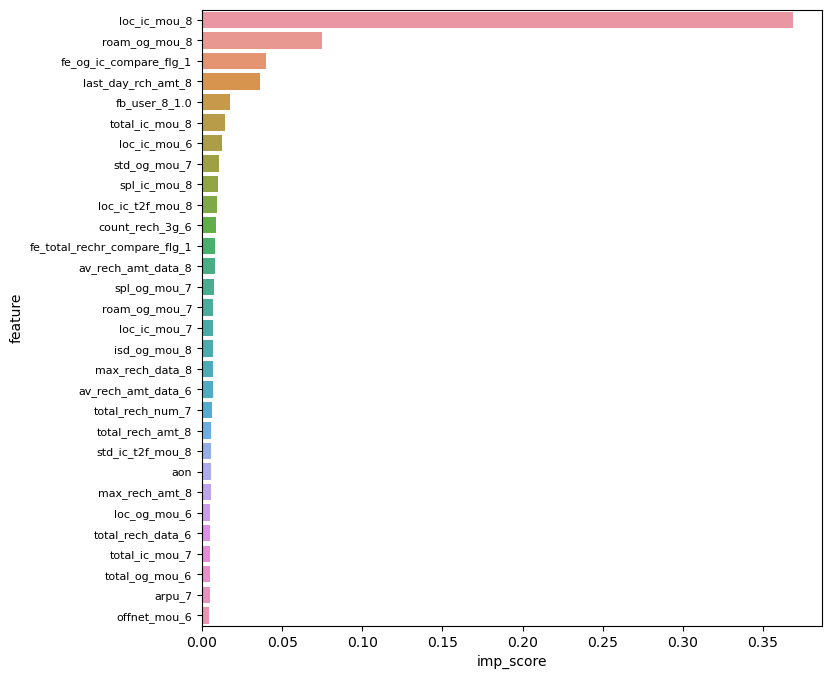

In [180]:
# visulize the importance with barplot
plt.figure(figsize=(8,8 ))
sns.barplot(y = feature_plt['feature'],x = feature_plt.imp_score)
plt.yticks(fontsize = 8)
plt.show()

#### weights of features: Implement logistic model on top_imp_features

In [181]:
X_train_imp = X_train[top_imp_features]
X_test_imp = X_test[top_imp_features]

In [182]:
scaler_imp = StandardScaler()

In [183]:
X_train_imp_scaled = scaler_imp.fit_transform(X_train_imp)
X_test_imp_scaled = scaler_imp.transform(X_test_imp)

In [184]:
log_imp_model = LogisticRegression(class_weight='balanced',random_state=42)

In [185]:
log_imp_model = log_imp_model.fit(X_train_imp_scaled,y_train)

In [186]:
train_imp_pred = log_imp_model.predict(X_train_imp_scaled)

In [187]:
accuracy_score(y_train,train_imp_pred)

0.7954039878364865

In [188]:
evaluation_mat(y_train,train_imp_pred)

,score
accuracy,0.795404
sensitivity,0.826201
specificity,0.791922
precison,0.309825
false_postive_rate,0.208078
auc_roc,0.809061


In [189]:
test_imp_pred = log_imp_model.predict(X_test_imp_scaled)

In [190]:
evaluation_mat(y_test,test_imp_pred)

,score
accuracy,0.792095
sensitivity,0.844084
specificity,0.786150
precison,0.310993
false_postive_rate,0.213850
auc_roc,0.815117


In [191]:
log_imp_model.coef_.reshape(-1)

array([-1.50464241,  0.24574605, -0.87672519, -0.42853702, -0.40764933,
       -0.04234773, -0.00683862,  0.05365373])

In [192]:
feature_weight_df = pd.DataFrame({'feature': X_train_imp.columns,'weight_coeff': (log_imp_model.coef_.reshape(-1))})
feature_weight_df

,feature,weight_coeff
0,loc_ic_mou_8,-1.504642
1,roam_og_mou_8,0.245746
2,fe_og_ic_compare_flg_1,-0.876725
3,last_day_rch_amt_8,-0.428537
4,fb_user_8_1.0,-0.407649
5,total_ic_mou_8,-0.042348
6,loc_ic_mou_6,-0.006839
7,std_og_mou_7,0.053654


## Recommendations to Business

Weight coefficients represent the impact of each feature on the likelihood of churn. Positive coefficients indicate that an increase in the feature value makes churn more likely, while negative coefficients indicate the opposite.

- __loc_ic_mou_8__:
High local incoming call minutes in the eighth month are negatively associated with churn. Customers with lower local incoming call usage are more likely to churn.


- __roam_og_mou_8__:
Roaming outgoing call minutes in the eighth month positively influence churn. Customers who use more roaming outgoing call minutes are slightly inclined towards churning. Offering an improved roaming package with more favorable costs can contribute to retaining customers with the company.


- __fe_og_ic_compare_flg_1/*Dervied flag*__: 
If the total outgoing and incoming call minutes decrease by over 25 percent compared to the average usage of previous months, it is advisable for the company to raise an alert, as there is a substantial likelihood that the customer may churn.


- __last_day_rch_amt_8__:
A higher recharge amount on the last day of the eighth month is associated with a lower churn probability. Customers who recharge more on the last day are less likely to churn.


- __fb_user_8_1.0__:
Having active Facebook usage in the eighth month reduces churn likelihood. Customers who use Facebook are less likely to switch providers.


- __loc_ic_mou_6 / total_ic_mou_8  /spl_ic_mou_7__ :
Give particular attention to international packages in a broader sense, as they play a significant role in driving down the number of churn cases.

It's important to note that the magnitudes of the weight coefficients indicate the relative impact of each feature. This summary provides insights into how specific customer behaviors and usage patterns influence the likelihood of churn in a telecom context.






# kaggle test run
 - Peform data preparation similar to how we did before for test data and use only tranform for scaling.

In [193]:
churn_test = pd.read_csv('test.csv')


In [194]:
churn_test.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        30000 non-null  int64  
 1    circle_id                 30000 non-null  int64  
 2    loc_og_t2o_mou            29684 non-null  float64
 3    std_og_t2o_mou            29684 non-null  float64
 4    loc_ic_t2o_mou            29684 non-null  float64
 5    last_date_of_month_6      30000 non-null  object 
 6    last_date_of_month_7      29798 non-null  object 
 7    last_date_of_month_8      29633 non-null  object 
 8    arpu_6                    30000 non-null  float64
 9    arpu_7                    30000 non-null  float64
 10   arpu_8                    30000 non-null  float64
 11   onnet_mou_6               28831 non-null  float64
 12   onnet_mou_7               28828 non-null  float64
 13   onnet_mou_8               28325 non-null  fl

In [195]:
# duplicate check
print('churn_test.shape: '+str(churn_test.shape))
churn_test_copy = churn_test.copy()

churn_test_copy = churn_test_copy.drop_duplicates()
print('churn_test_copy.shape: ' + str(churn_test_copy.shape))

churn_test.shape: (30000, 171)
churn_test_copy.shape: (30000, 171)


About 90 percent are non churn case

In [196]:
churn_test.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.0,29684.0,29684.0,29684.0,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.0,28828.0,28325.0,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.0,28828.0,28325.0,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.

In [197]:
# Checking loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou columns as they have only 0 as value
print(churn_test['loc_og_t2o_mou'].unique())
print(churn_test['std_og_t2o_mou'].unique())
print(churn_test['loc_ic_t2o_mou'].unique())

[ 0. nan]
[ 0. nan]
[ 0. nan]


In [198]:
# drop loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou
churn_test = churn_test.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1)

In [199]:
# drop id
churn_test = churn_test.drop(['id'],axis=1)

In [200]:
churn_test.shape

(30000, 167)

In [201]:
# changing night_pck_user_X, fb_user_X columns to categorical values
cat_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
churn_test[cat_cols] = churn_test[cat_cols].astype('object')

In [202]:
#### Get date columns 
cols = churn_test.columns.to_list()
date_cols = [col for col in cols if 'date' in col]
print("Date columns present in churn df: {}".format(str(date_cols)))
len(date_cols)

Date columns present in churn df: ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


9

In [203]:
num_cols = churn_test.select_dtypes(include=['float64','int64']).columns

In [204]:
print('Numerical columns in churn: {} '.format(len(churn_test.select_dtypes(include=['float64','int64']).columns)) )
print('Categorical columns in churn: {} '.format(len(churn_test.select_dtypes(include=['object']).columns)) )

Numerical columns in churn: 152 
Categorical columns in churn: 15 


#### Missing value imputation

In [205]:
def miss_fun(df):
    
    miss_count = churn_test.isnull().sum()
    miss_perc = (churn_test.isnull().sum()/churn_test.shape[0])*100
    
    # concat to create new df
    miss_df= pd.concat([miss_count,miss_perc],axis=1)

    # rename  the columns
    miss_df = miss_df.rename(columns={0: "missing_count", 1: "missing_percentage"})

    # filter only columns with missing values and sort with descending order
    miss_df = miss_df[miss_df.iloc[:,1] !=0].sort_values('missing_percentage',ascending = False)

    print('Number of features with missing values: {} of total {}.'.format(miss_df.shape[0],churn_test.shape[1]))
    return miss_df

In [206]:
miss_df = miss_fun(churn_test)
miss_df

Number of features with missing values: 122 of total 167.


,missing_count,missing_percentage
max_rech_data_6,22415,74.716667
count_rech_2g_6,22415,74.716667
fb_user_6,22415,74.716667
date_of_last_rech_data_6,22415,74.716667
night_pck_user_6,22415,74.716667
count_rech_3g_6,22415,74.716667
arpu_2g_6,22415,74.716667
av_rech_amt_data_6,22415,74.716667
arpu_3g_6,22415,74.716667
total_rech_data_6,22415,74.716667


In [207]:
# Missing values in date column
churn_test[date_cols].isnull().sum()

last_date_of_month_6            0
last_date_of_month_7          202
last_date_of_month_8          367
date_of_last_rech_6           506
date_of_last_rech_7           533
date_of_last_rech_8          1161
date_of_last_rech_data_6    22415
date_of_last_rech_data_7    22294
date_of_last_rech_data_8    22078
dtype: int64

In [208]:
# update date columns with 1 which have date else 0
for col in date_cols:
    churn_test.loc[churn_test[col].notnull(),col] = 1
    churn_test.loc[churn_test[col].isnull(),col] = 0
    churn_test[col] = churn_test[col].astype('int64')

In [209]:
churn_test[date_cols].isnull().sum()

last_date_of_month_6        0
last_date_of_month_7        0
last_date_of_month_8        0
date_of_last_rech_6         0
date_of_last_rech_7         0
date_of_last_rech_8         0
date_of_last_rech_data_6    0
date_of_last_rech_data_7    0
date_of_last_rech_data_8    0
dtype: int64

In [210]:
print(len(churn_test[(churn_test['date_of_last_rech_6']==0) & (churn_test['total_rech_amt_6'] == 0)]))
print(len(churn_test[(churn_test['date_of_last_rech_7']==0) & (churn_test['total_rech_amt_7'] == 0)]))
print(len(churn_test[(churn_test['date_of_last_rech_8']==0) & (churn_test['total_rech_amt_8'] == 0)]))

506
533
1161


In [211]:
print(len(churn_test[(churn_test['date_of_last_rech_data_6']==0) & (churn_test['total_rech_data_6'].isnull())]))
print(len(churn_test[(churn_test['date_of_last_rech_data_7']==0) & (churn_test['total_rech_data_7'].isnull())]))
print(len(churn_test[(churn_test['date_of_last_rech_data_8']==0) & (churn_test['total_rech_data_8'].isnull())]))

22415
22294
22078


It is clear that date is null as there is no recharge done by customer.

In [212]:
# so update all the columns related to recharge to 0
rech_cols_zero = [col for col in miss_df.index if (('rech' in col) & ('date' not in col))]
rech_cols_zero

['max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'total_rech_data_6',
 'av_rech_amt_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'count_rech_2g_8']

In [213]:
# update null recharge columns to 0
churn_test[rech_cols_zero] = churn_test[rech_cols_zero].fillna(0)

In [214]:
# Missing values in categorical column
churn_test[cat_cols].isnull().sum()

night_pck_user_6    22415
night_pck_user_7    22294
night_pck_user_8    22078
fb_user_6           22415
fb_user_7           22294
fb_user_8           22078
dtype: int64

Even though more than 70 percent data is missing, but since they are special column lets impute them with new category 2. We can do dummy encoding later.

In [215]:
for col in cat_cols:
    churn_test[col] = churn_test[col].fillna(2).astype('object')

In [216]:
churn_test[cat_cols].isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
dtype: int64

In [217]:
# Delete columns with more than 70 percent missing values
miss_df = miss_fun(churn_test)
drop_70_miss_cols = miss_df[miss_df.loc[:,'missing_percentage'] > 70].index

Number of features with missing values: 93 of total 167.


In [218]:
churn_test = churn_test.drop(drop_70_miss_cols,axis = 1)

In [219]:
miss_df = miss_fun(churn_test)
miss_df

Number of features with missing values: 87 of total 161.


,missing_count,missing_percentage
ic_others_8,1675,5.583333
og_others_8,1675,5.583333
std_og_t2t_mou_8,1675,5.583333
loc_ic_t2f_mou_8,1675,5.583333
loc_ic_t2t_mou_8,1675,5.583333
loc_og_mou_8,1675,5.583333
loc_ic_mou_8,1675,5.583333
std_og_t2f_mou_8,1675,5.583333
loc_og_t2c_mou_8,1675,5.583333
std_ic_t2t_mou_8,1675,5.583333


In [220]:
# We are left with most of the numeric columns related in Incoming and outgoing calls - mou
pd.concat([miss_df[['6' in ind for ind in miss_df.index ]].reset_index(),
           miss_df[['7' in ind for ind in miss_df.index ]].reset_index(),
           miss_df[['8' in ind for ind in miss_df.index ]].reset_index()],axis=1)

,index,missing_count,missing_percentage,index,missing_count,missing_percentage,index,missing_count,missing_percentage
0,std_ic_t2o_mou_6,1169,3.896667,loc_ic_t2t_mou_7,1172,3.906667,ic_others_8,1675,5.583333
1,offnet_mou_6,1169,3.896667,og_others_7,1172,3.906667,og_others_8,1675,5.583333
2,ic_others_6,1169,3.896667,loc_ic_t2m_mou_7,1172,3.906667,std_og_t2t_mou_8,1675,5.583333
3,isd_og_mou_6,1169,3.896667,std_ic_t2m_mou_7,1172,3.906667,loc_ic_t2f_mou_8,1675,5.583333
4,roam_ic_mou_6,1169,3.896667,loc_ic_t2f_mou_7,1172,3.906667,loc_ic_t2t_mou_8,1675,5.583333
5,isd_ic_mou_6,1169,3.896667,loc_ic_mou_7,1172,3.906667,loc_og_mou_8,1675,5.583333
6,roam_og_mou_6,1169,3.896667,std_ic_t2t_mou_7,1172,3.906667,loc_ic_mou_8,1675,5.583333
7,spl_ic_mou_6,1169,3.896667,std_ic_t2f_mou_7,1172,3.906667,std_og_t2f_mou_8,1675,5.583333
8,og_others_6,1169,3.896667,std_ic_t2o_mou_7,1172,3.906667,loc_og_t2c_mou_8,1675,5.583333
9,loc_og_t2t_mou_6,1169,3.896667,std_ic_mou_7,1172,3.906667,std_ic_t2t_mou_8,1675,5.583333


##### common missing count in each month:
month 6 = 2768;
month 7 = 2687;
month 8 = 3703

Lets compare mou of incoming and outgoing features with total mou of incoming and outgoing calls info

In [221]:
print(churn_test[(churn_test.roam_og_mou_6.isnull()) & (churn_test.total_og_mou_6 == 0)].shape)
print(churn_test[(churn_test.roam_ic_mou_6.isnull()) & (churn_test.total_ic_mou_6 == 0)].shape)

(1169, 161)
(1169, 161)


In [222]:
print(churn_test[(churn_test.roam_og_mou_7.isnull()) & (churn_test.total_og_mou_7 == 0)].shape)
print(churn_test[(churn_test.roam_ic_mou_7.isnull()) & (churn_test.total_ic_mou_7 == 0)].shape)

(1172, 161)
(1172, 161)


In [223]:
print(churn_test[(churn_test.roam_og_mou_8.isnull()) & (churn_test.total_og_mou_8 == 0)].shape)
print(churn_test[(churn_test.roam_ic_mou_8.isnull()) & (churn_test.total_ic_mou_8 == 0)].shape)

(1675, 161)
(1675, 161)


Looks like value of total mou of ic and og values are 0 when other sub features mou of ic/og are null. So updating the other features as 0

In [224]:
mou_6 = miss_df[[(('6' in ind) & ('date' not in ind))  for ind in miss_df.index ]].index
mou_7 = miss_df[[(('7' in ind) & ('date' not in ind))  for ind in miss_df.index ]].index
mou_8 = miss_df[[(('8' in ind) & ('date' not in ind))  for ind in miss_df.index ]].index

In [225]:
churn_test[mou_6] = churn_test[mou_6].fillna(0)
churn_test[mou_7] = churn_test[mou_7].fillna(0)
churn_test[mou_8] = churn_test[mou_8].fillna(0)

In [226]:
miss_df = miss_fun(churn_test)
miss_df

Number of features with missing values: 0 of total 161.


,missing_count,missing_percentage


In [227]:
# drop columns related to last_date_of_month_X

churn_test = churn_test.drop(['last_date_of_month_8','last_date_of_month_7','last_date_of_month_6'],axis=1)

### Derived columns / feature engineering

Using following 'total' columns, lets try to identify if there is pattern for churn cases:
- total_og_mou_6 + total_ic_mou_6
- total_og_mou_7 + total_ic_mou_6
- total_og_mou_8 + total_ic_mou_6

-----
Combined total recharge of call services and data bundles
- total_rech_amt_6 + (total_rech_data_6 * av_rech_amt_data_6)
- total_rech_amt_7 + (total_rech_data_6 * av_rech_amt_data_6)
- total_rech_amt_8 + (total_rech_data_6 * av_rech_amt_data_6)


Idea is to combine month 6 and 7 and compare its average with that of month 8.

- Grouping the customers based on AON 


In [228]:
churn_test_FE = churn_test.copy()

###### Combine both incoming and outgoing call activity of months 6/7 and compare with month 8

In [229]:
churn_test_FE['fe_total_og_ic_6_7_avg'] = ((churn_test_FE.total_og_mou_6 + churn_test_FE.total_og_mou_7)/2) + ((churn_test_FE.total_ic_mou_6 + churn_test_FE.total_ic_mou_7)/2)

In [230]:
# compare 'total_og_ic_6_7_avg' with incoming and outgoing calls activities in month 8 with cut off 75% of avg of month 6/7
churn_test_FE['fe_og_ic_8'] = churn_test_FE.total_og_mou_8 + churn_test_FE.total_ic_mou_8
churn_test_FE['fe_og_ic_compare_flg']= churn_test_FE['fe_og_ic_8'] > (churn_test_FE['fe_total_og_ic_6_7_avg'] * 0.75)

In [231]:
churn_test_FE['fe_og_ic_compare_flg'] = churn_test_FE['fe_og_ic_compare_flg'].map({False:0,True:1})

###### Combine recharge of data and calls of months 6/7 and compare that with month 8

In [232]:
# first calculate total recharge amount for data
churn_test_FE['fe_total_rech_data_amnt_6_7'] = (churn_test_FE.total_rech_data_6 * churn_test_FE.av_rech_amt_data_6)+(churn_test_FE.total_rech_data_7 * churn_test_FE.av_rech_amt_data_7)

# combine recharge amount of call and data
churn_test_FE['fe_combine_total_6_7'] = (churn_test_FE.total_rech_amt_6 + churn_test_FE.total_rech_amt_7 + churn_test_FE['fe_total_rech_data_amnt_6_7'])/2


In [233]:
# compare 'fe_combine_total_6_7' with combined recharge amount in month 8 with cut off 75%
churn_test_FE['fe_total_rechr_compare_flg'] =((churn_test_FE.total_rech_data_8 * churn_test_FE.av_rech_amt_data_8)+churn_test_FE.total_rech_amt_8) > (churn_test_FE['fe_combine_total_6_7'] * 0.75)

In [234]:
churn_test_FE['fe_total_rechr_compare_flg'] = churn_test_FE['fe_total_rechr_compare_flg'].map({False:0,True:1})

###### Grouping the customers based on AON

In [235]:
np.percentile(churn_test_FE.aon/365,[0,25,50,75,100])

array([ 0.49315068,  1.27671233,  2.3369863 ,  4.91780822, 11.49863014])

In [236]:
ranges = [0.49315068,  1.28219178,  2.37808219,  4.96712329, 11.88219178]
categories = ['Less than 1 year', '1-2 years', '2-4.5 years', '4.5+ years']
churn_test_FE['fe_aon_group'] = pd.cut(churn_test_FE.aon/365, bins = ranges, labels=categories)

#### Drop the columns having less than 2 unique values

In [237]:
drop_col = [col for col in churn_test.columns if len(churn_test[col].unique()) < 2]
drop_col

['circle_id',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [238]:
churn_test = churn_test.drop(drop_col,axis = 1)
churn_test_FE = churn_test_FE.drop(drop_col,axis = 1)

In [239]:
churn_test[['fe_total_rechr_compare_flg','fe_og_ic_compare_flg','fe_aon_group']] =churn_test_FE[['fe_total_rechr_compare_flg','fe_og_ic_compare_flg','fe_aon_group']].astype('object') 

In [240]:
cat_cols = churn_test.select_dtypes('object').columns

#### Dummy variable creation

In [241]:
dummy_churn = pd.get_dummies(churn_test[cat_cols],drop_first=True)
dummy_churn

,night_pck_user_6_1.0,night_pck_user_6_2.0,night_pck_user_7_1.0,night_pck_user_7_2.0,night_pck_user_8_1.0,night_pck_user_8_2.0,fb_user_6_1.0,fb_user_6_2.0,fb_user_7_1.0,fb_user_7_2.0,fb_user_8_1.0,fb_user_8_2.0,fe_total_rechr_compare_flg_1,fe_og_ic_compare_flg_1,fe_aon_group_2-4.5 years,fe_aon_group_4.5+ years,fe_aon_group_Less than 1 year
0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0
1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,0
2,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1
3,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0
4,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0
29996,0,1,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0
29997,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,1
29998,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0


In [242]:
churn_test = pd.concat([churn_test,dummy_churn],axis=1)
churn_test_FE = pd.concat([churn_test_FE,dummy_churn],axis=1)

In [243]:
churn_test = churn_test.drop(cat_cols,axis =1)
churn_test_FE = churn_test_FE.drop(cat_cols,axis =1)

In [244]:
churn_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_2.0,night_pck_user_7_1.0,night_pck_user_7_2.0,night_pck_user_8_1.0,night_pck_user_8_2.0,fb_user_6_1.0,fb_user_6_2.0,fb_user_7_1.0,fb_user_7_2.0,fb_user_8_1.0,fb_user_8_2.0,fe_total_rechr_compare_flg_1,fe_og_ic_compare_flg_1,fe_aon_group_2-4.5 years,fe_aon_group_4.5+ years,fe_aon_group_Less than 1 year
0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,1,1,1,30,30,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1692,0.00,0.00,0.00,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0
1,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,1,1,1,250,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,0
2,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,5

In [245]:
churn_test_scaled = scaler.transform(churn_test)

In [246]:
# kaggle test csv on xgb model
kaggle_xgb_churn_prob = xgb_best.predict(churn_test_scaled)
kaggle = pd.DataFrame(kaggle_xgb_churn_prob, columns=['churn'])
kaggle.to_excel('kaggle_result.xlsx',index=False)

In [252]:
# kaggle test csv on rf model
kaggle_rf_churn_prob = rf_best.predict(churn_test_scaled)
kaggle_rf = pd.DataFrame(kaggle_rf_churn_prob, columns=['churn'])
kaggle_rf.to_excel('kaggle_result_rf.xlsx',index=False)